<a href="https://colab.research.google.com/github/Ed-Ricketts/Pyrit/blob/master/EURUSD_z_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown
!pip install tensorflow-gpu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os
import io



from google.colab import files
uploaded = files.upload()



#
df = pd.read_csv(io.BytesIO(uploaded['EURUSD_s.csv']))
# Dataset is now stored in a Pandas Dataframe


#df = pd.read_csv('EURUSD_s.csv', parse_dates=['date time'], index_col=['date time'])
#df.shape

Saving EURUSD_s.csv to EURUSD_s.csv


In [ ]:
df = pd.read_csv("EURUSD_s.csv", parse_dates=['date time'], index_col="date time", dayfirst=True)
df = df.sort_index()

In [ ]:
df.shape

(12941, 4)

In [ ]:
df.tail()

,o,h,l,c
date time,,,,
2018-01-12 16:56:00,1.21937,1.21968,1.21924,1.21965
2018-01-12 16:57:00,1.21962,1.22083,1.21943,1.22046
2018-01-12 16:58:00,1.22046,1.22053,1.21976,1.21987
2018-01-12 16:59:00,1.21986,1.22000,1.21975,1.22000
2018-01-12 17:00:00,1.21923,1.21924,1.21923,1.21924


In [ ]:
df['minute'] = df.index.minute
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df.tail(10)

,o,h,l,c,minute,hour,day_of_month,day_of_week,month
date time,,,,,,,,,
2018-01-12 16:51:00,1.21948,1.21949,1.21935,1.21945,51,16,12,4,1
2018-01-12 16:52:00,1.21947,1.21955,1.21943,1.21955,52,16,12,4,1
2018-01-12 16:53:00,1.21951,1.21968,1.21950,1.21963,53,16,12,4,1
2018-01-12 16:54:00,1.21964,1.21964,1.21934,1.21945,54,16,12,4,1
2018-01-12 16:55:00,1.21944,1.21944,1.21904,1.21936,55,16,12,4,1
2018-01-12 16:56:00,1.21937,1.21968,1.21924,1.21965,56,16,12,4,1
2018-01-12 16:57:00,1.21962,1.22083,1.21943,1.22046,57,16,12,4,1
2018-01-12 16:58:00,1.22046,1.22053,1.21976,1.21987,58,16,12,4,1
2018-01-12 16:59:00,1.21986,1.22000,1.21975,1.22000,59,16,12,4,1


In [ ]:
df["c"].describe()

count    12941.000000
mean         1.201744
std          0.005590
min          1.191650
25%          1.196710
50%          1.202650
75%          1.205140
max          1.220920
Name: c, dtype: float64

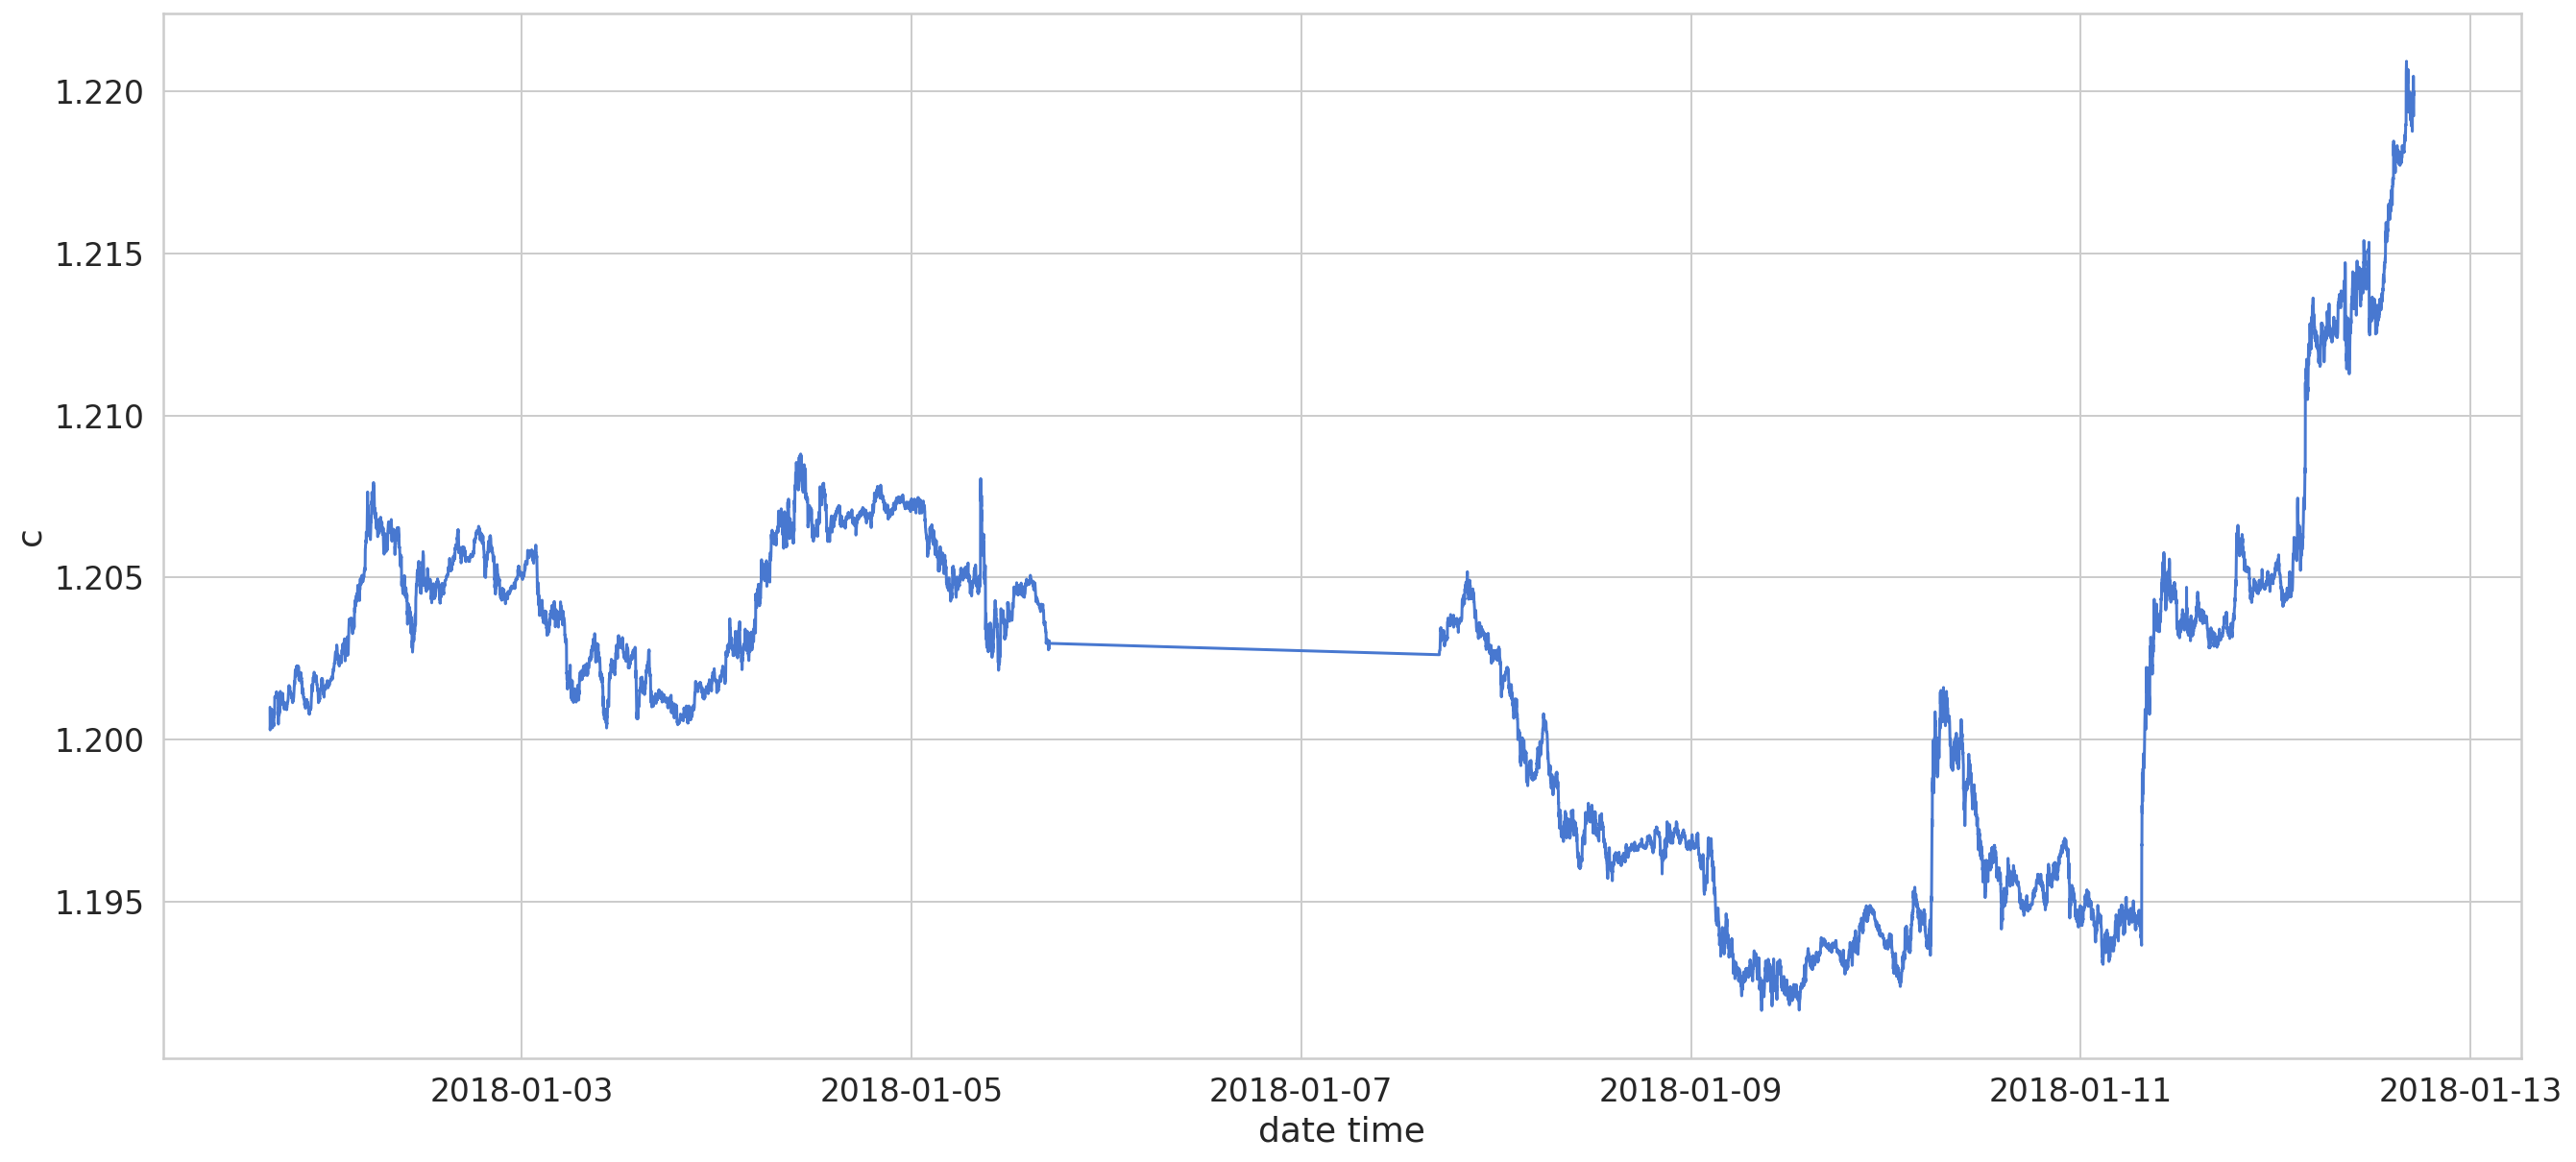

In [ ]:
sns.lineplot(x=df.index, y="c", data=df);

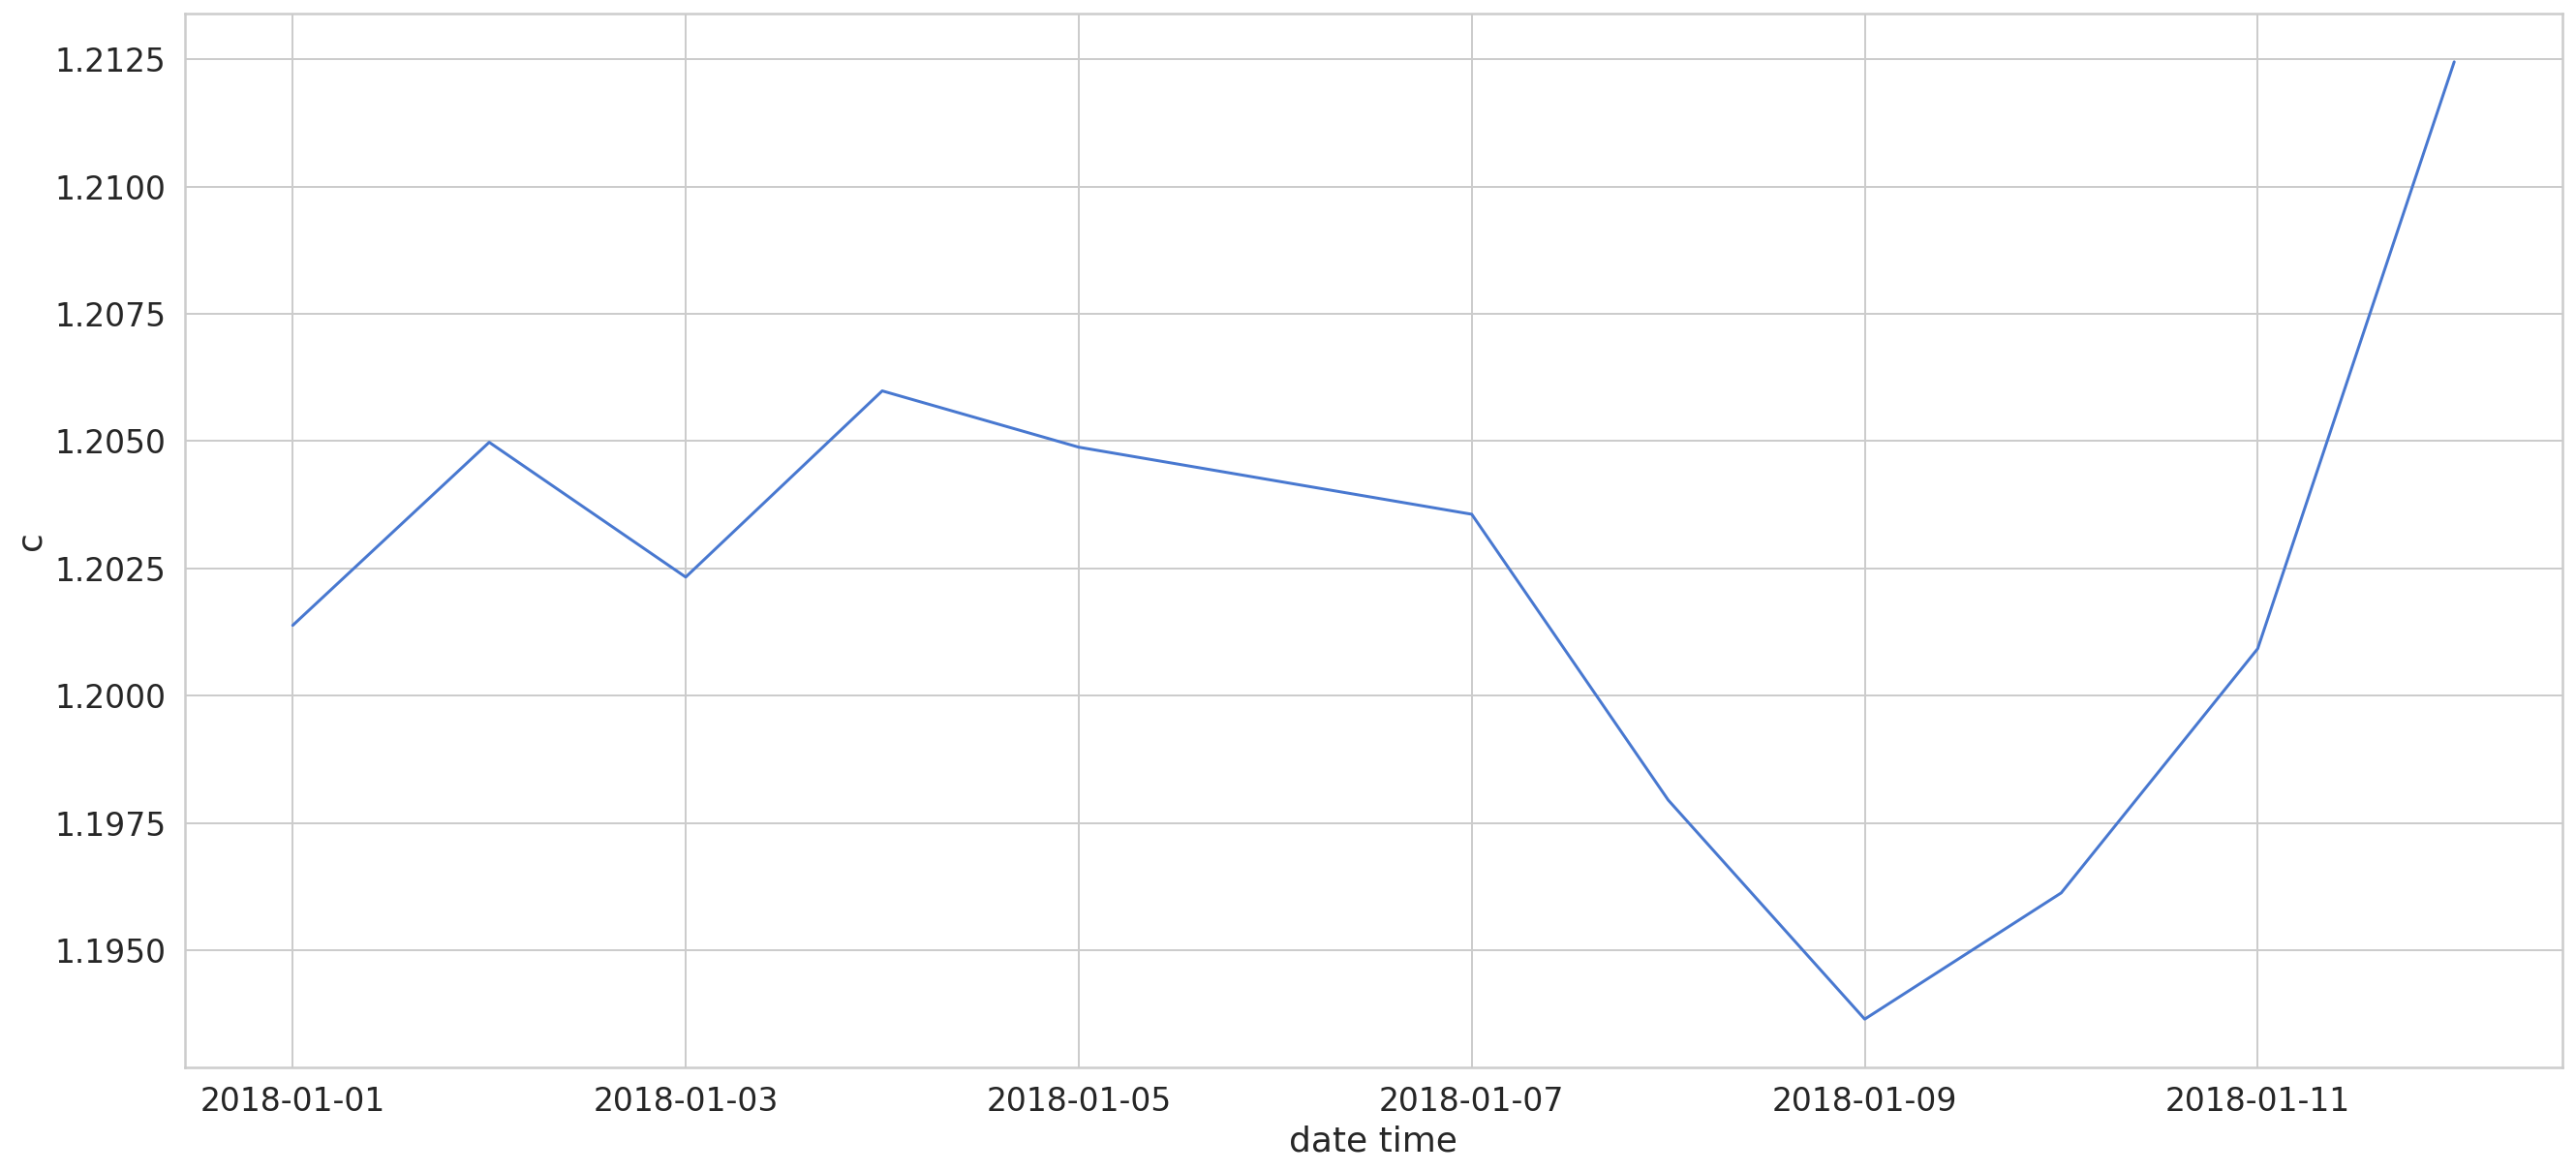

In [ ]:
#df_by_month = df.resample('M').sum()
df_by_hour = df.resample ('D').mean()


sns.lineplot(x=df_by_hour.index, y="c", data=df_by_hour);
#sns.lineplot(x=df_by_minute.index, y="c");#

AttributeError: ignored

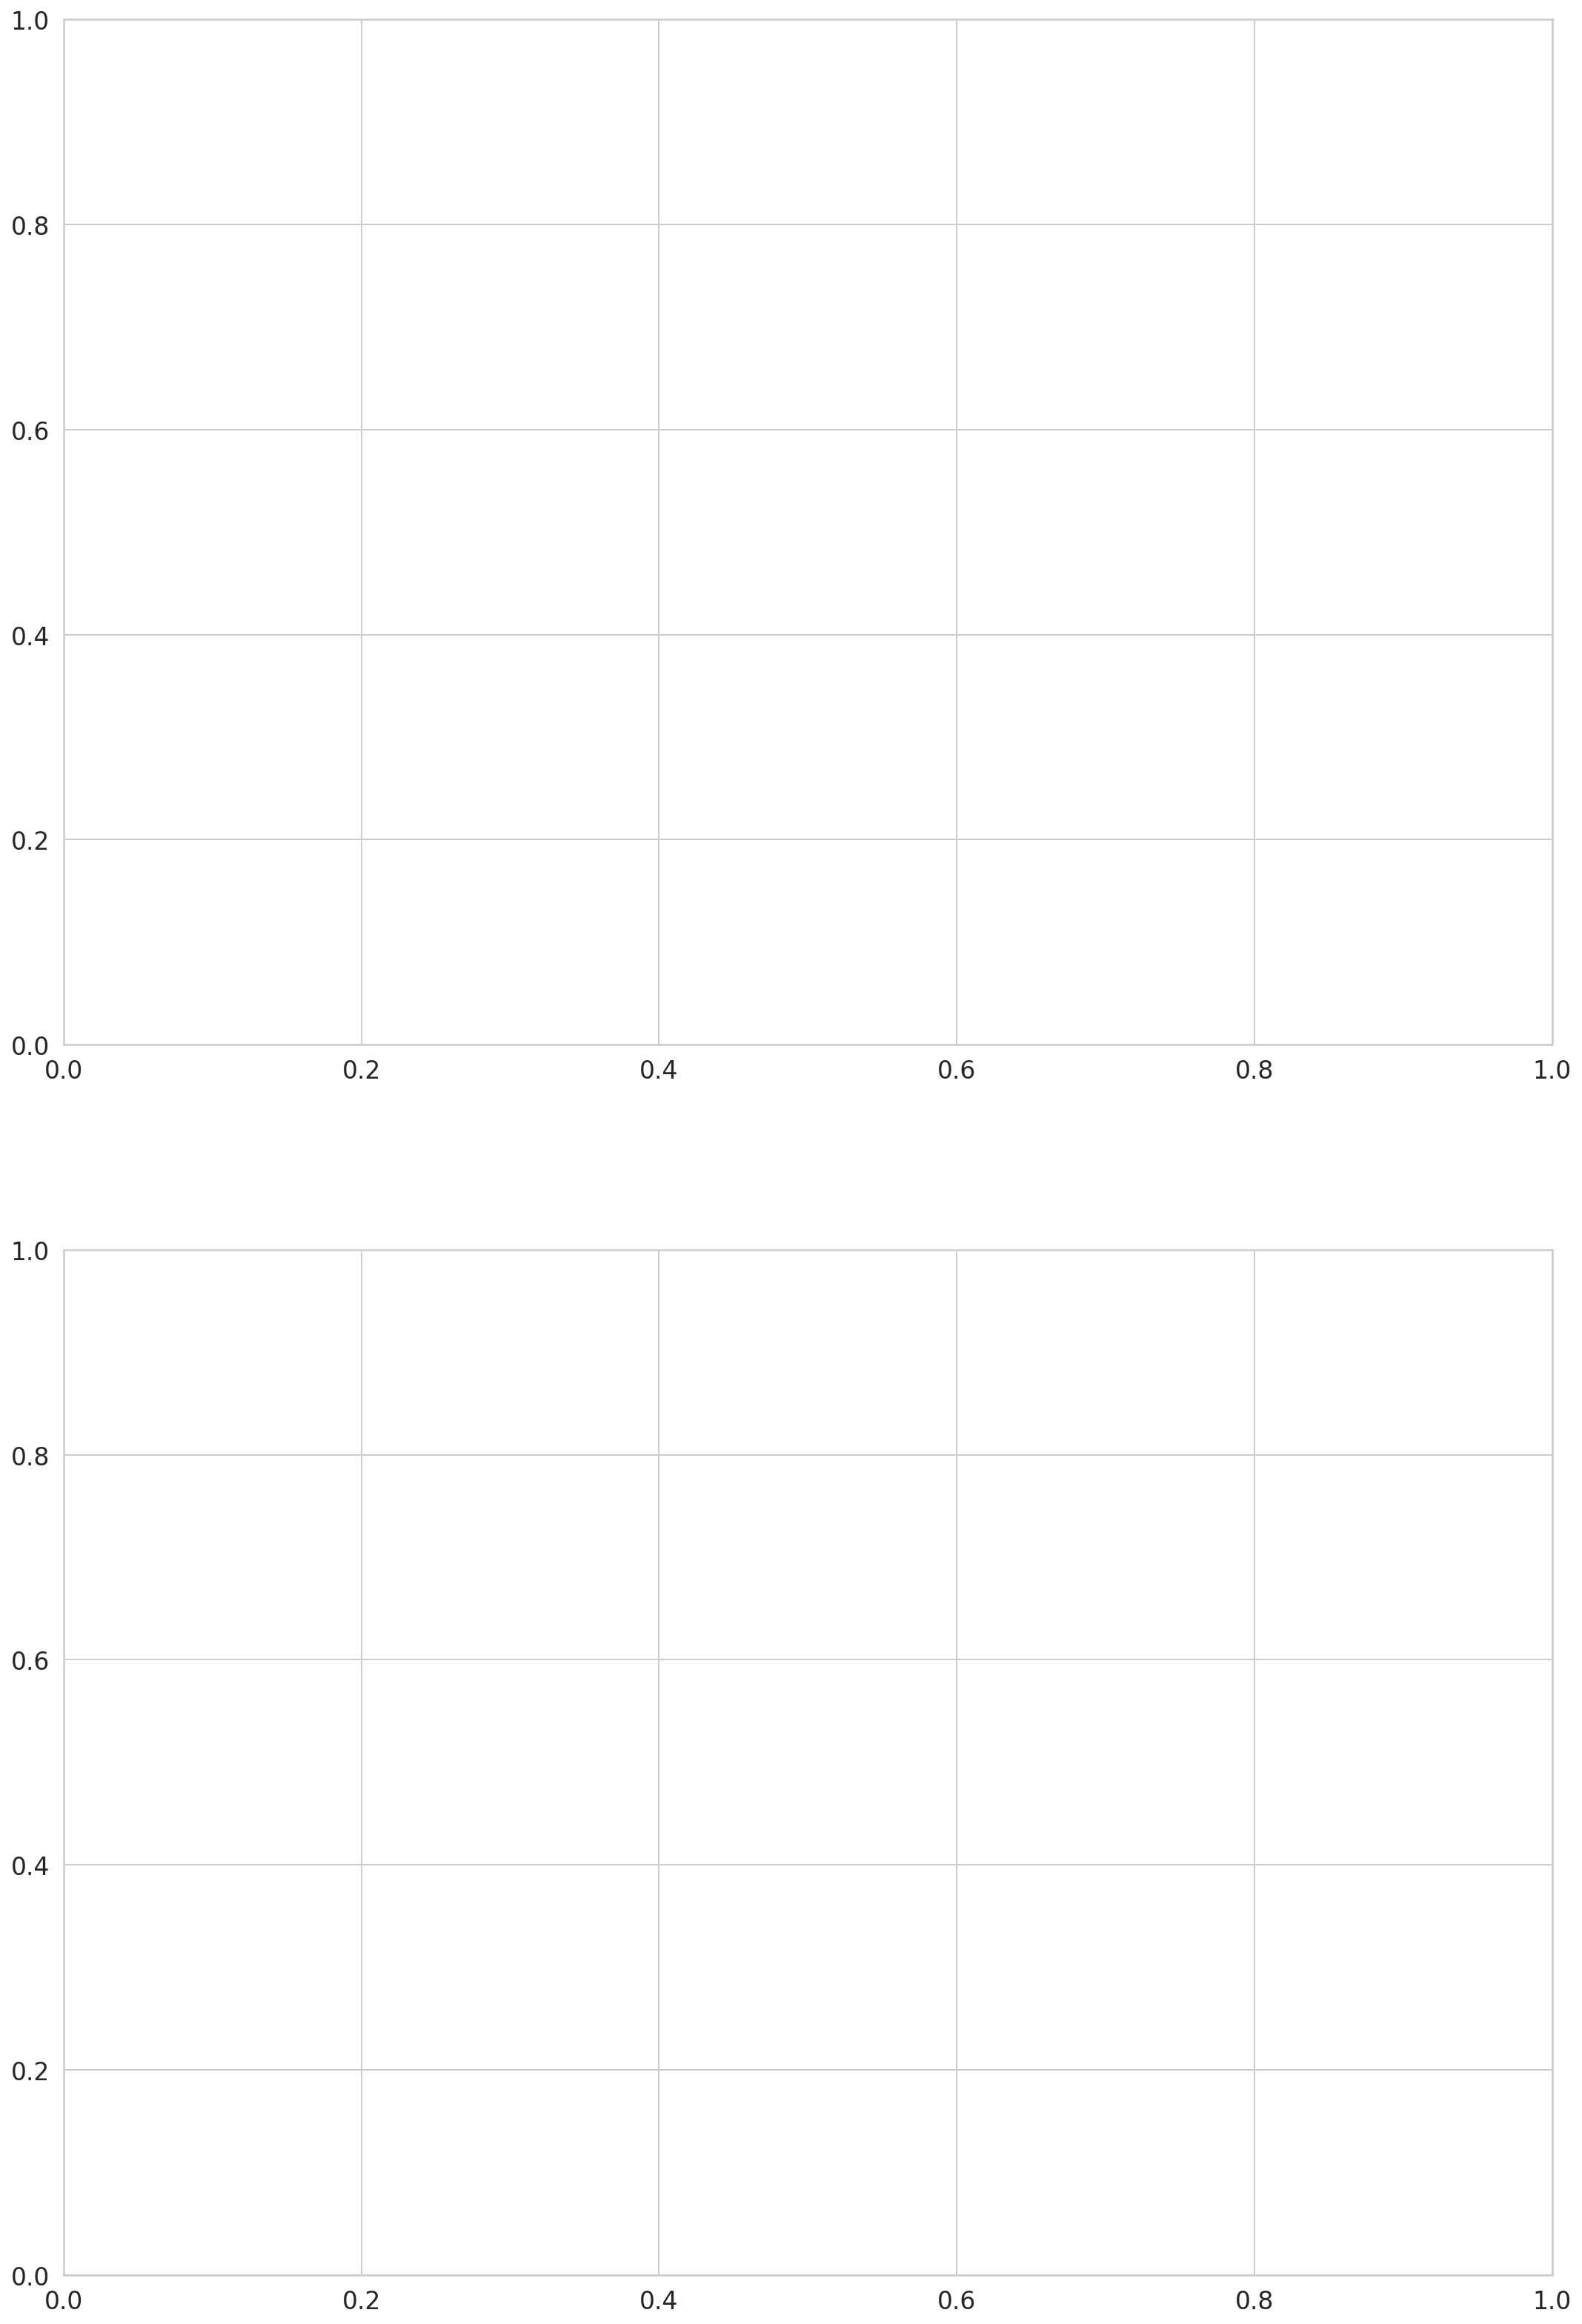

In [ ]:
fig,(ax1)= plt.subplots(nrows=2)

#, ax3, ax4
fig.set_size_inches(18, 28)

sns.pointplot(data=df, x='hour', y='c', ax=ax1)
#sns.pointplot(data=df, x='hour', y='c', hue='is_holiday', ax=ax2)
#sns.pointplot(data=df, x='hour', y='c', hue='is_weekend', ax=ax3)
#sns.pointplot(data=df, x='hour', y='c', hue='season', ax=ax4);

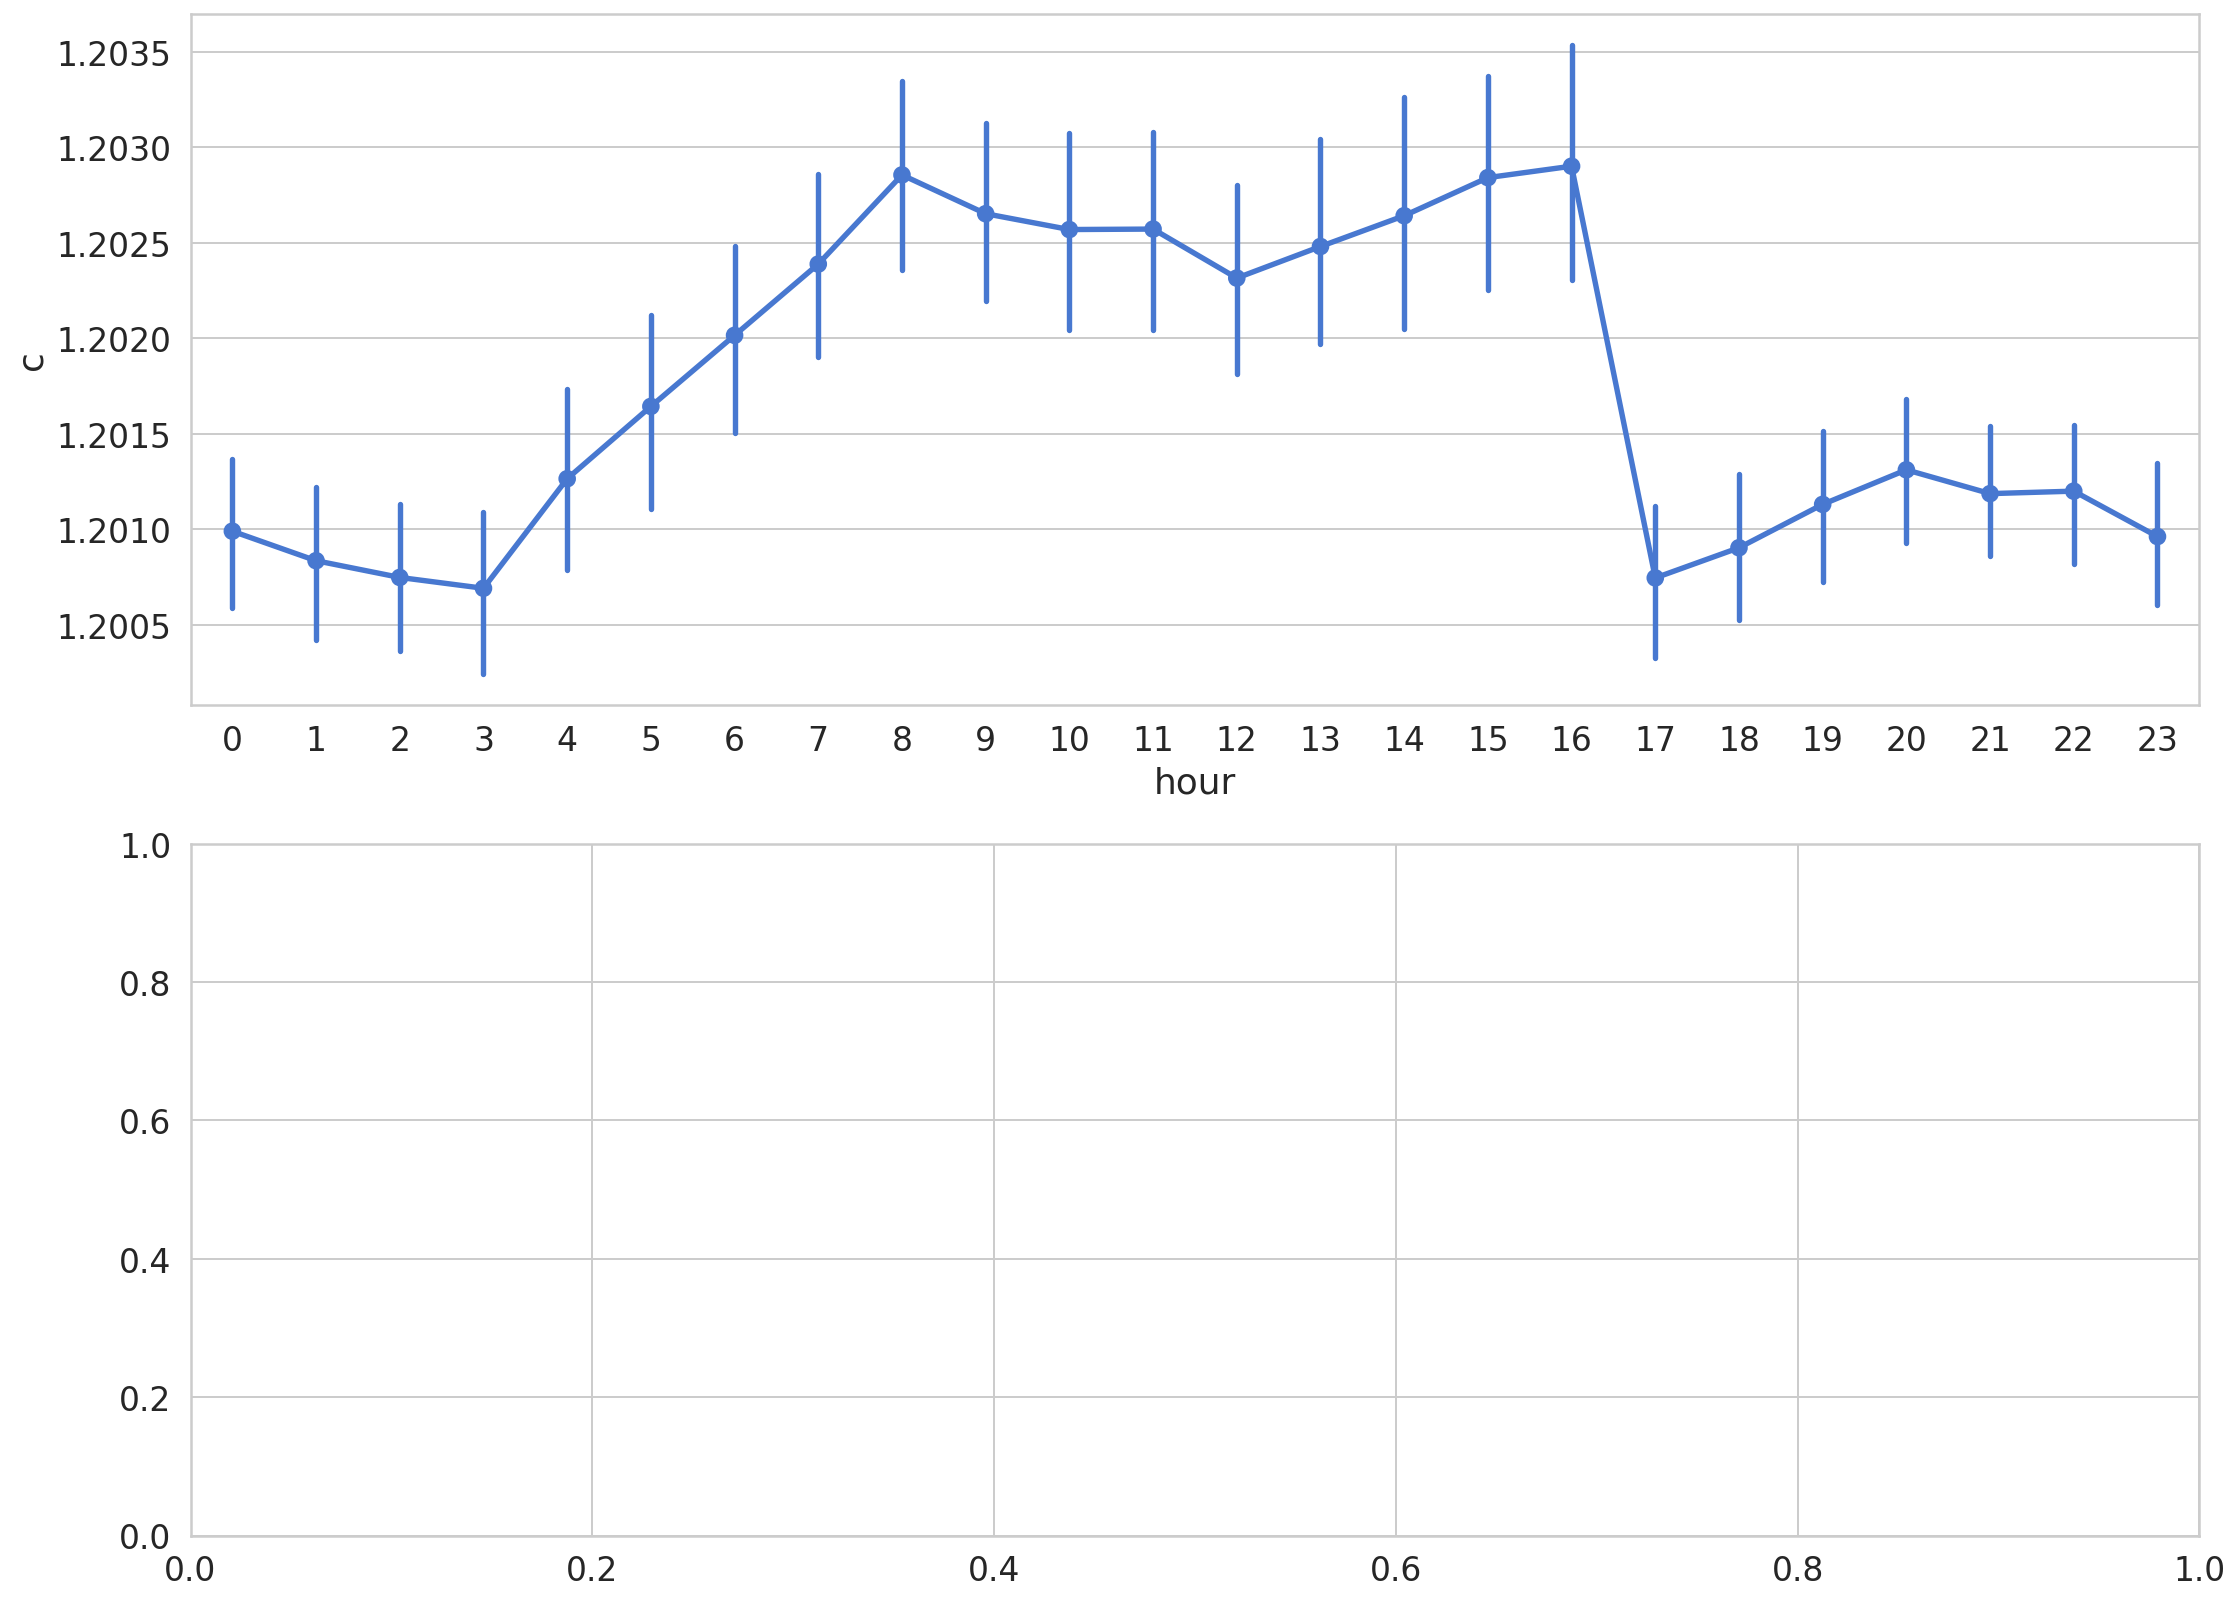

In [ ]:
fig,(ax1, ax2)= plt.subplots(nrows=2)
fig.set_size_inches(18, 14)

sns.pointplot(data=df, x='hour', y='c', ax=ax1)
#sns.pointplot(data=df, x='day_of_week', y='c', hue='season', ax=ax2);

In [ ]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size].copy(), df.iloc[train_size:len(df)].copy()
print(len(train), len(test))

11646 1295


In [ ]:
train.tail()

,o,h,l,c,minute,hour,day_of_month,day_of_week,month
date time,,,,,,,,,
2018-01-11 19:21:00,1.20660,1.20665,1.20655,1.20661,21,19,11,3,1
2018-01-11 19:22:00,1.20660,1.20660,1.20628,1.20634,22,19,11,3,1
2018-01-11 19:23:00,1.20639,1.20639,1.20629,1.20631,23,19,11,3,1
2018-01-11 19:24:00,1.20630,1.20630,1.20596,1.20602,24,19,11,3,1
2018-01-11 19:25:00,1.20603,1.20604,1.20589,1.20589,25,19,11,3,1


In [ ]:
test.tail()

,o,h,l,c,minute,hour,day_of_month,day_of_week,month
date time,,,,,,,,,
2018-01-12 16:56:00,1.21937,1.21968,1.21924,1.21965,56,16,12,4,1
2018-01-12 16:57:00,1.21962,1.22083,1.21943,1.22046,57,16,12,4,1
2018-01-12 16:58:00,1.22046,1.22053,1.21976,1.21987,58,16,12,4,1
2018-01-12 16:59:00,1.21986,1.22000,1.21975,1.22000,59,16,12,4,1
2018-01-12 17:00:00,1.21923,1.21924,1.21923,1.21924,0,17,12,4,1


# Preprocessing

In [ ]:
from sklearn.preprocessing import RobustScaler

f_columns = ['o']

f_transformer = RobustScaler()
c_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
c_transformer = c_transformer.fit(train[['c']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['c'] = c_transformer.transform(train[['c']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['c'] = c_transformer.transform(test[['c']])

In [ ]:
train.head()

,o,h,l,c,minute,hour,day_of_month,day_of_week,month
date time,,,,,,,,,
2018-01-01 17:00:00,-0.179177,1.20100,1.20037,-0.102906,0,17,1,0,1
2018-01-01 17:01:00,-0.123487,1.20095,1.20017,-0.187651,1,17,1,0,1
2018-01-01 17:02:00,-0.181598,1.20043,1.20035,-0.171913,2,17,1,0,1
2018-01-01 17:03:00,-0.174334,1.20050,1.20031,-0.168281,3,17,1,0,1
2018-01-01 17:04:00,-0.164649,1.20049,1.20046,-0.165860,4,17,1,0,1


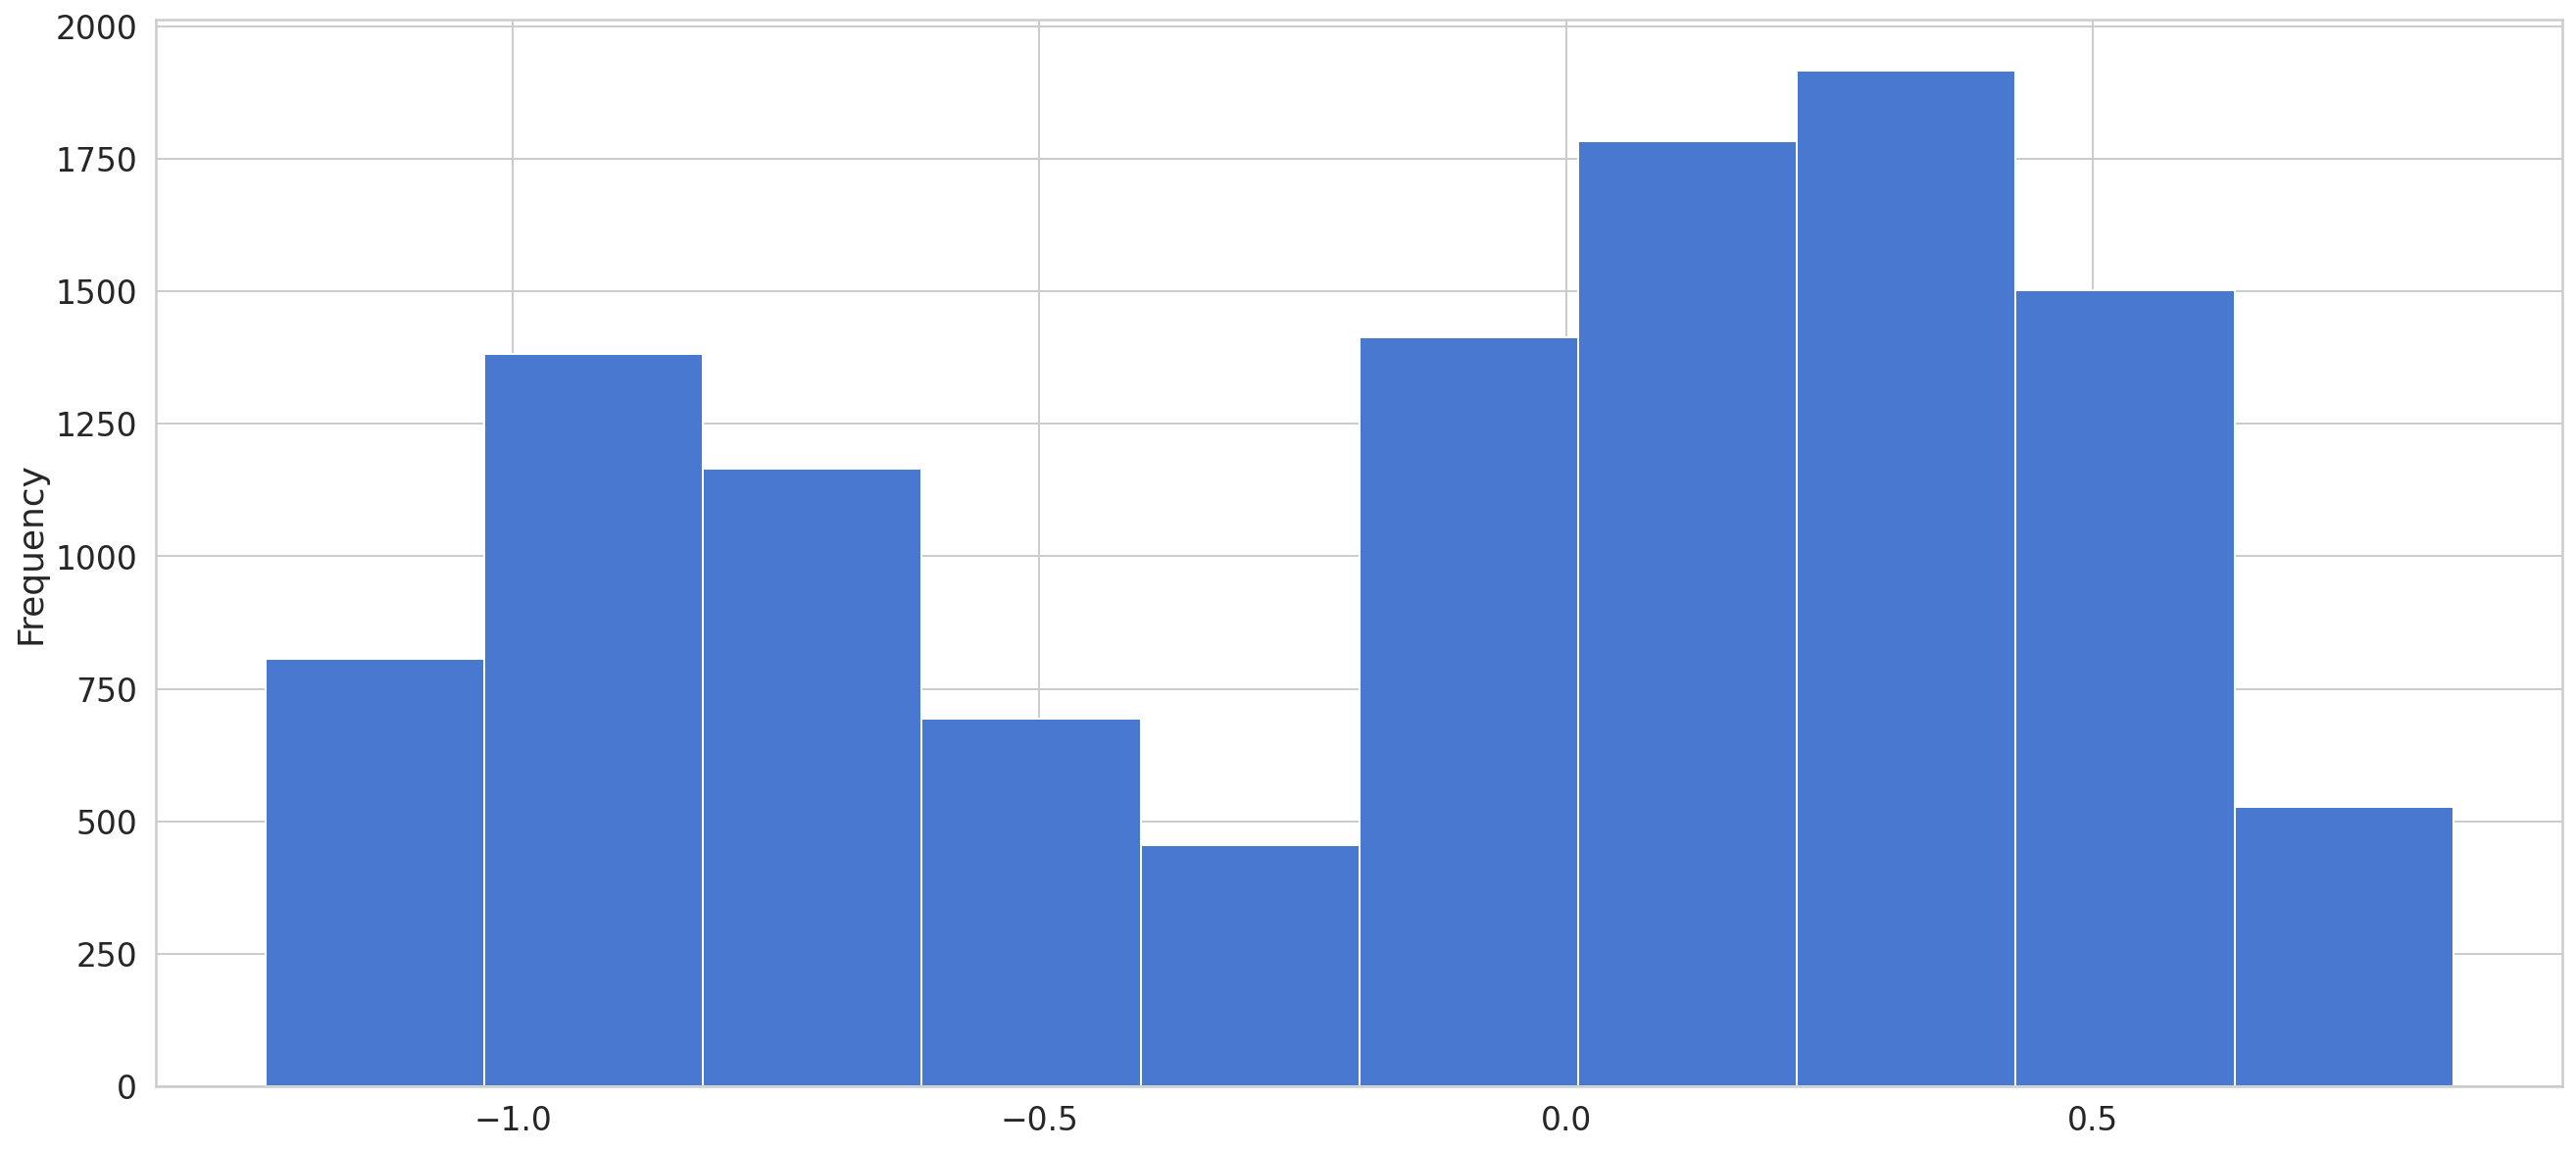

In [ ]:
train["c"].plot(kind="hist")

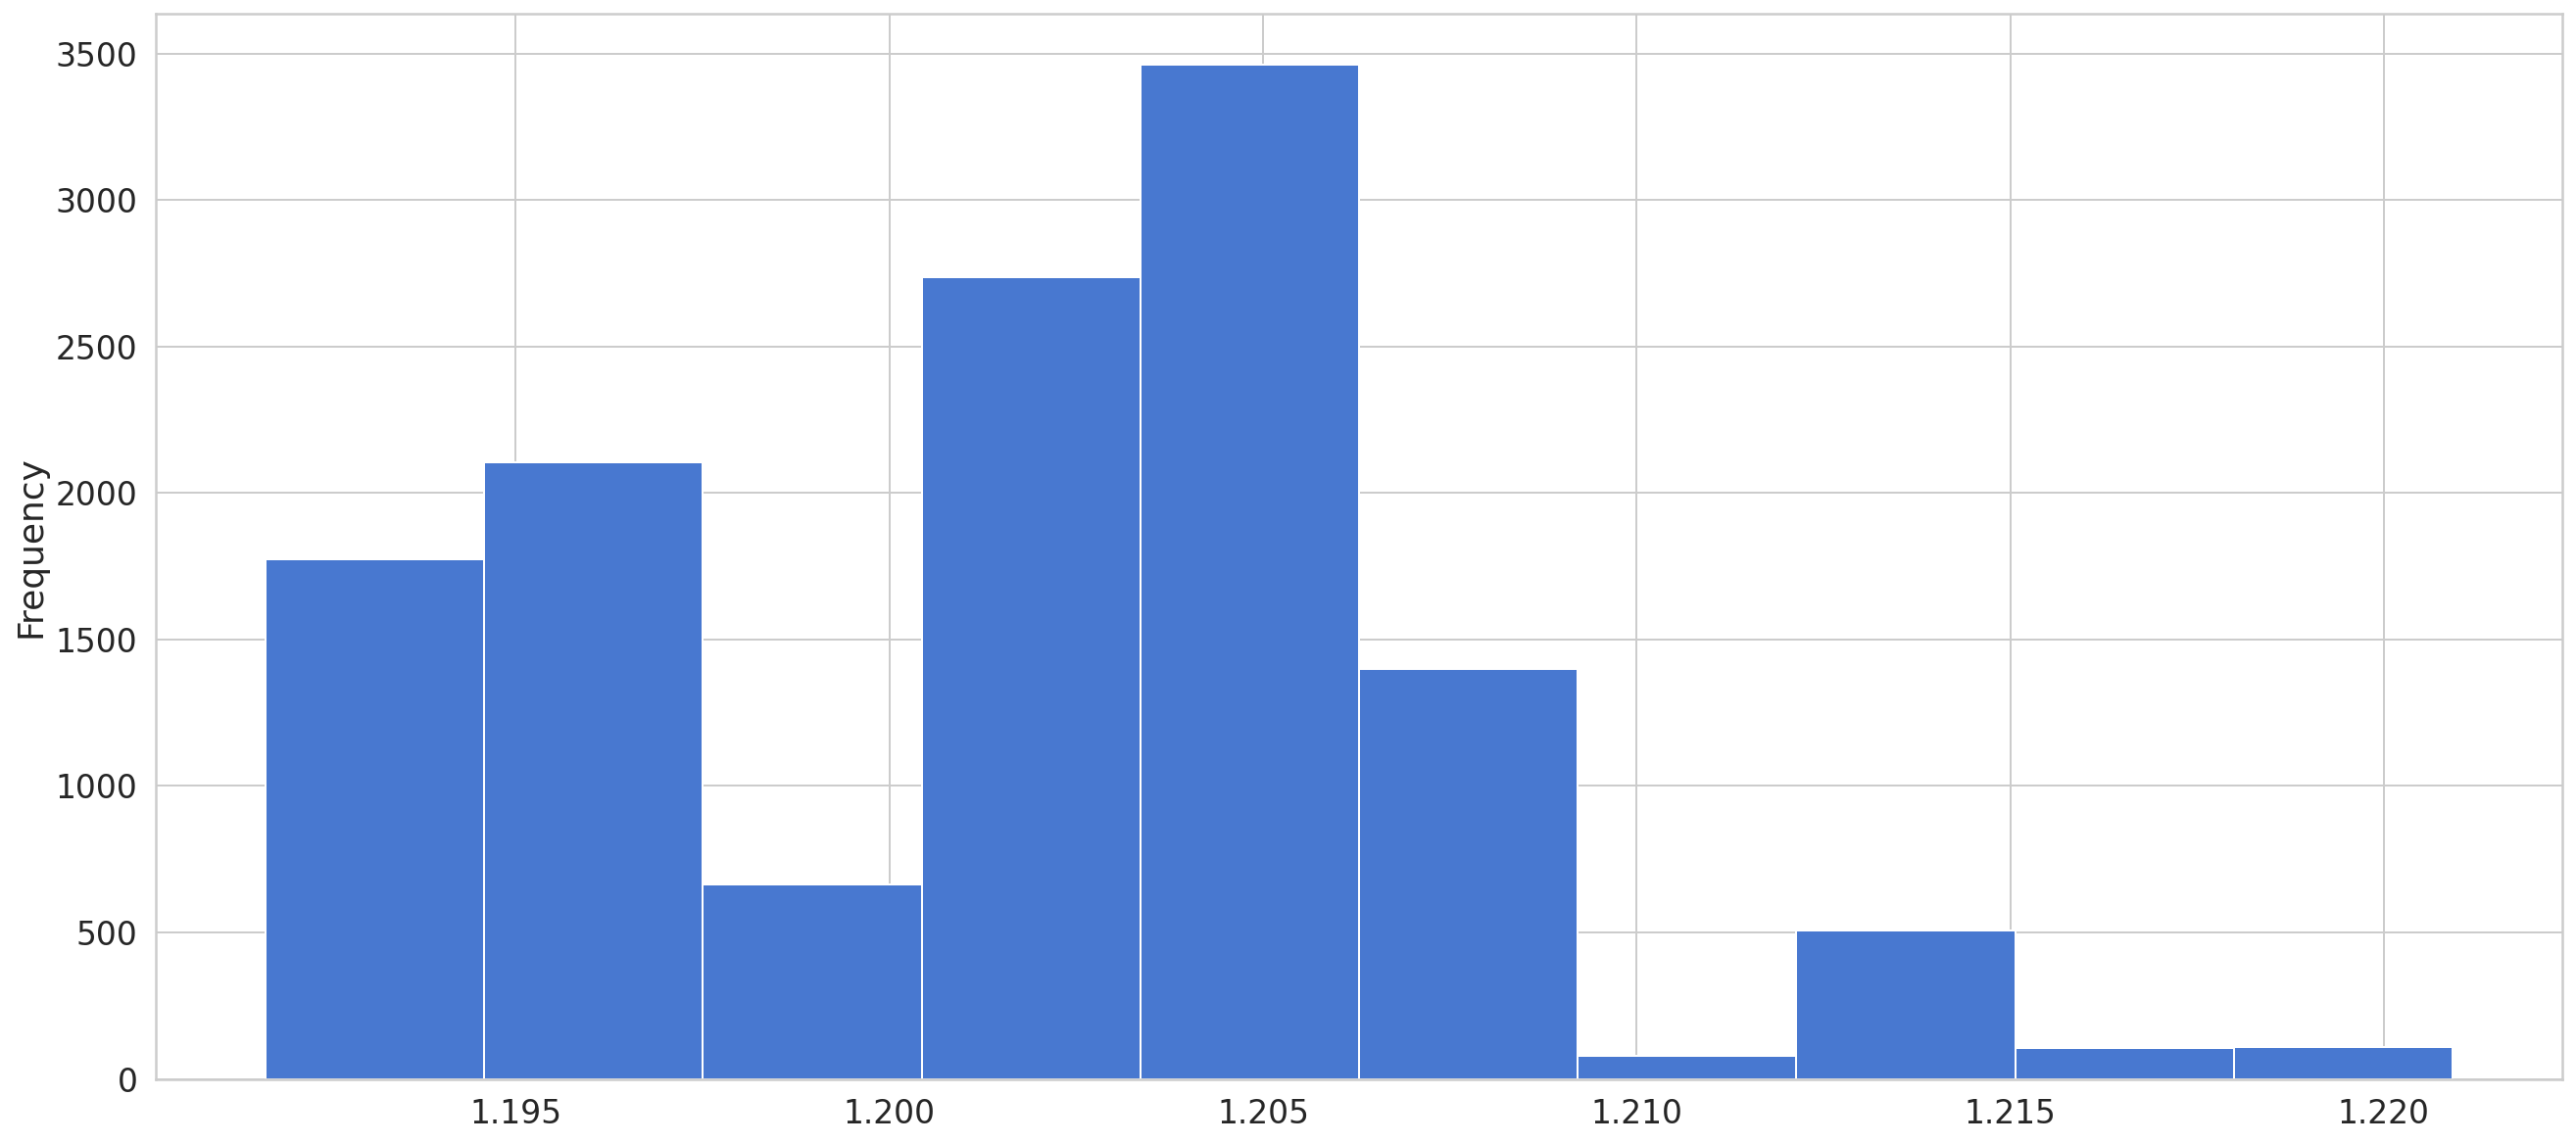

In [ ]:
df["c"].plot(kind="hist")

In [ ]:
def create_dataset(X, y, time_steps=1):
  # X is a dataframe with your features i.e. what you want to use to preict values in Y
  # Y is what you want to repdict
  # X and Y and should be the same length
  # time_step is an integer and is how many rows of X used to predict the next Y
    Xs, ys = [], []
    # start to loop through the Xs
    for i in range(len(X) - time_steps):
        # one "v" is a chunk of X with number of rows equal to time_step
        # turned into a matrix
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        # get the corresponding value of Y that we want v to predict         
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10

#reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[["o", "c"]].copy(), train.c, time_steps)
X_test, y_test = create_dataset(test[["o", "c"]].copy(), test.c, time_steps)

X_train.shape

(11636, 10, 2)

In [ ]:
print(X_test[0])
print(y_test[0])

[[0.49273608 0.49273608]
 [0.49152542 0.4842615 ]
 [0.4842615  0.49878935]
 [0.49757869 0.47336562]
 [0.47578692 0.48184019]
 [0.48184019 0.47457627]
 [0.47336562 0.46246973]
 [0.46368039 0.46610169]
 [0.46610169 0.49636804]
 [0.49757869 0.49636804]]
0.46610169491524694


In [ ]:
test[["o", "c"]].head(11)

,o,c
date time,,
2018-01-11 19:26:00,0.492736,0.492736
2018-01-11 19:27:00,0.491525,0.484262
2018-01-11 19:28:00,0.484262,0.498789
2018-01-11 19:29:00,0.497579,0.473366
2018-01-11 19:30:00,0.475787,0.481840
2018-01-11 19:31:00,0.481840,0.474576
2018-01-11 19:32:00,0.473366,0.462470
2018-01-11 19:33:00,0.463680,0.466102
2018-01-11 19:34:00,0.466102,0.496368


In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=10, 
    validation_split=0.1,
    shuffle=False)

Epoch 1/10
1048/1048 [==============================] - 6s 6ms/step - loss: 0.0022 - val_loss: 0.0589
Epoch 2/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0023 - val_loss: 0.0244
Epoch 3/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0016 - val_loss: 0.0158
Epoch 4/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0015 - val_loss: 0.0168
Epoch 5/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0015 - val_loss: 0.0143
Epoch 6/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0014 - val_loss: 0.0110
Epoch 7/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0012 - val_loss: 0.0090
Epoch 8/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0012 - val_loss: 0.0126
Epoch 9/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0013 - val_loss: 0.0085
Epoch 10/10
1048/1048 [==============================] - 5s 5ms/step - loss: 0.001

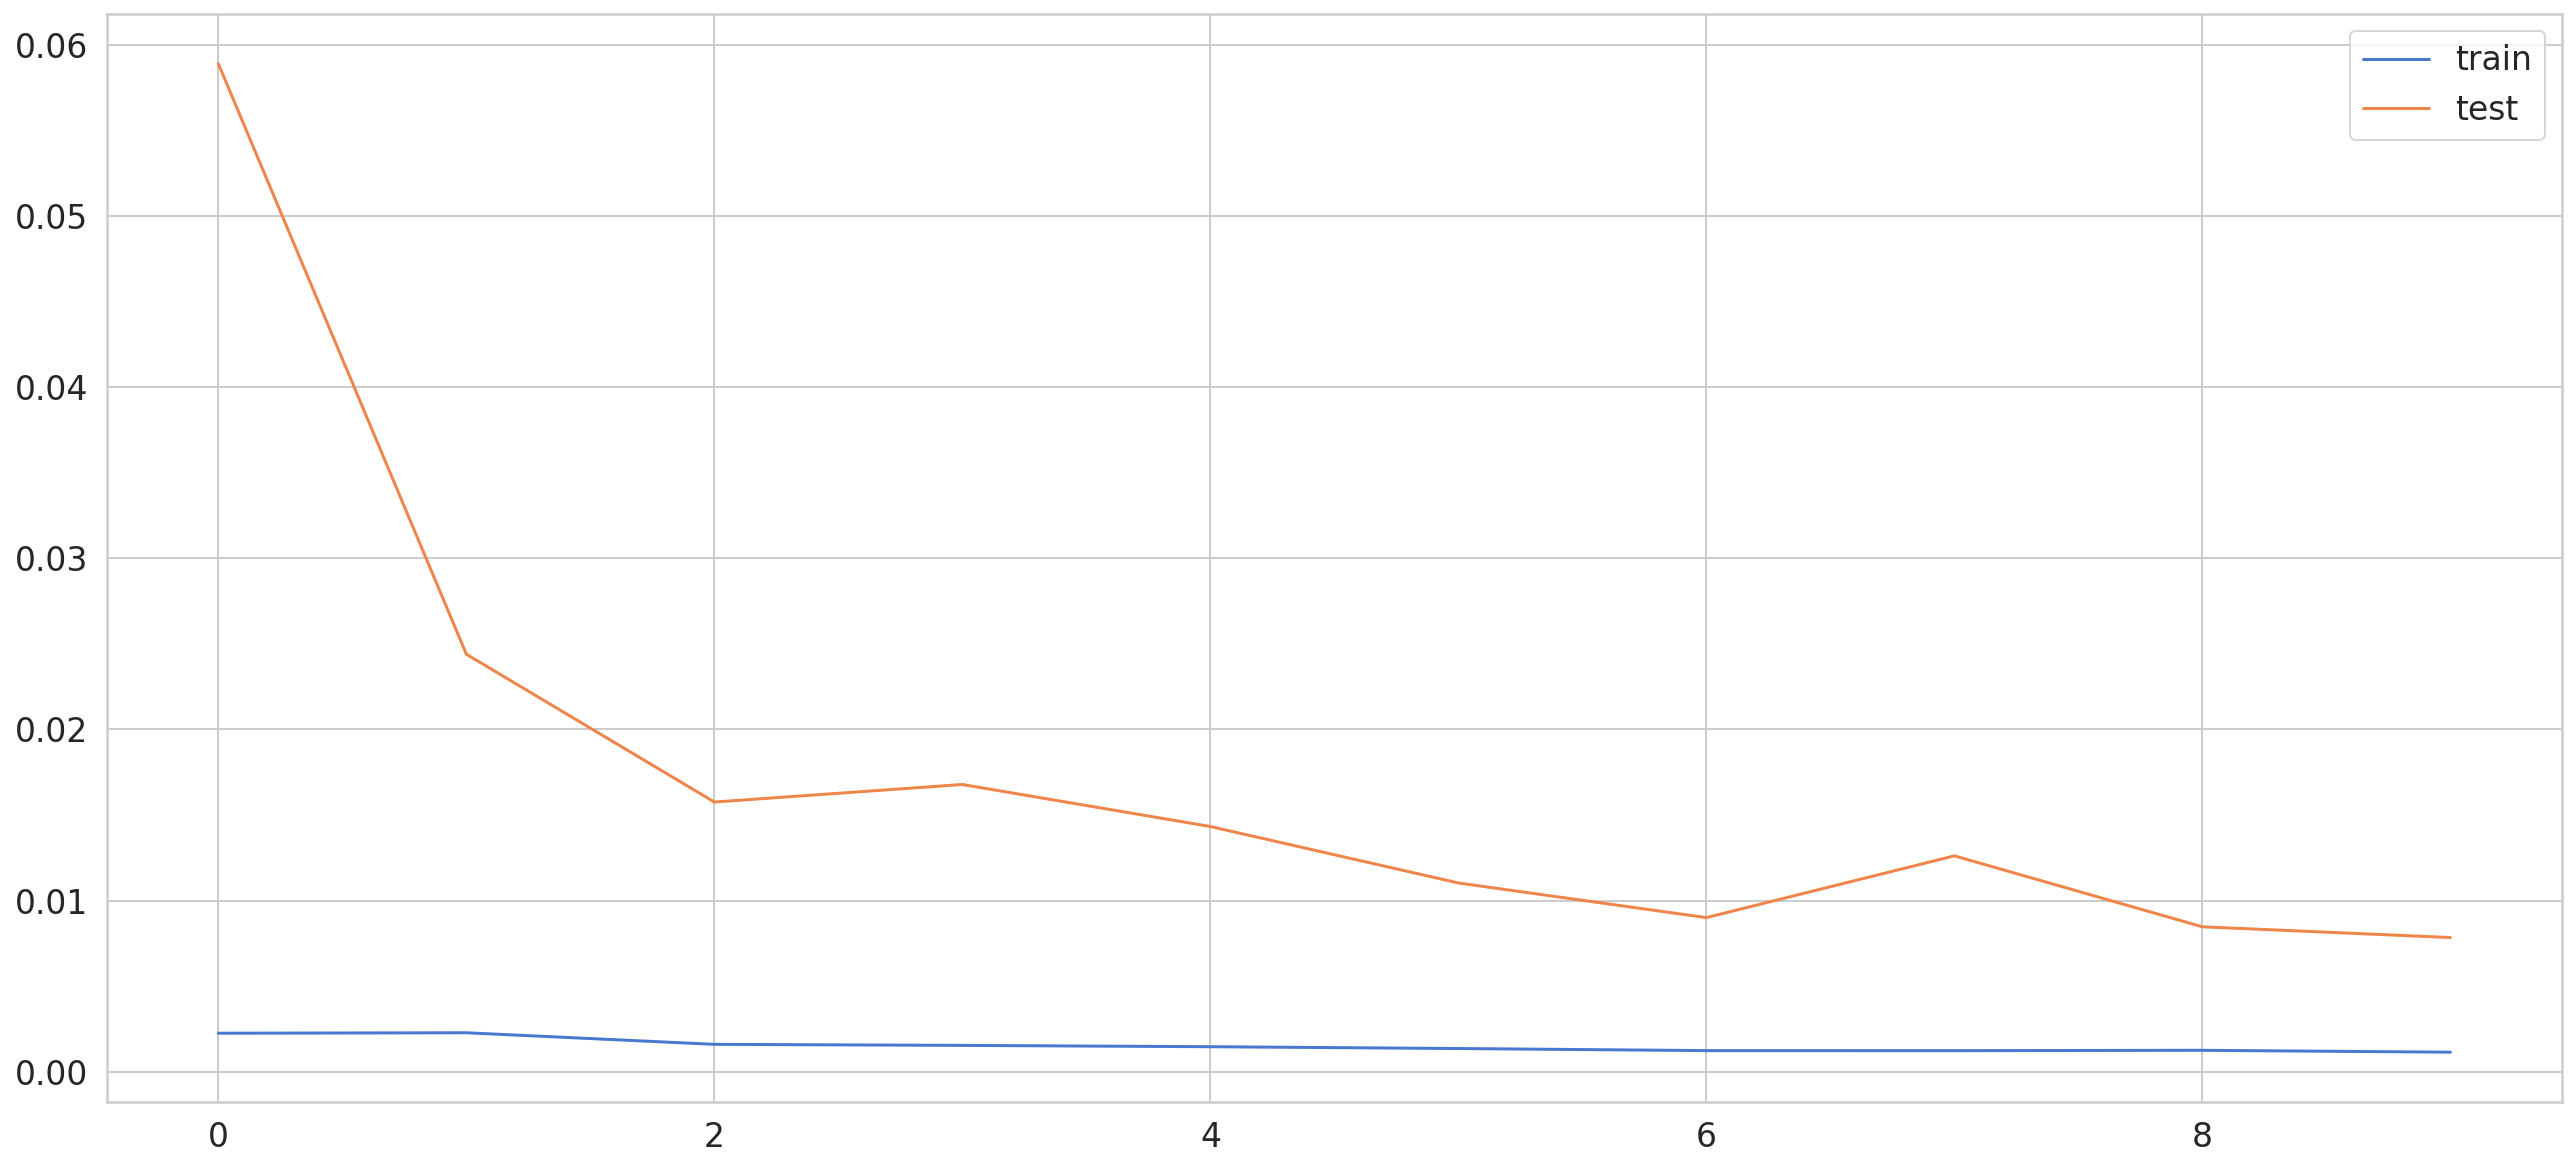

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_pred_hist = model.predict(X_train)

In [ ]:
y_train_inv = c_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = c_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = c_transformer.inverse_transform(y_pred)
y_pred_hist_inv = c_transformer.inverse_transform(y_pred_hist)

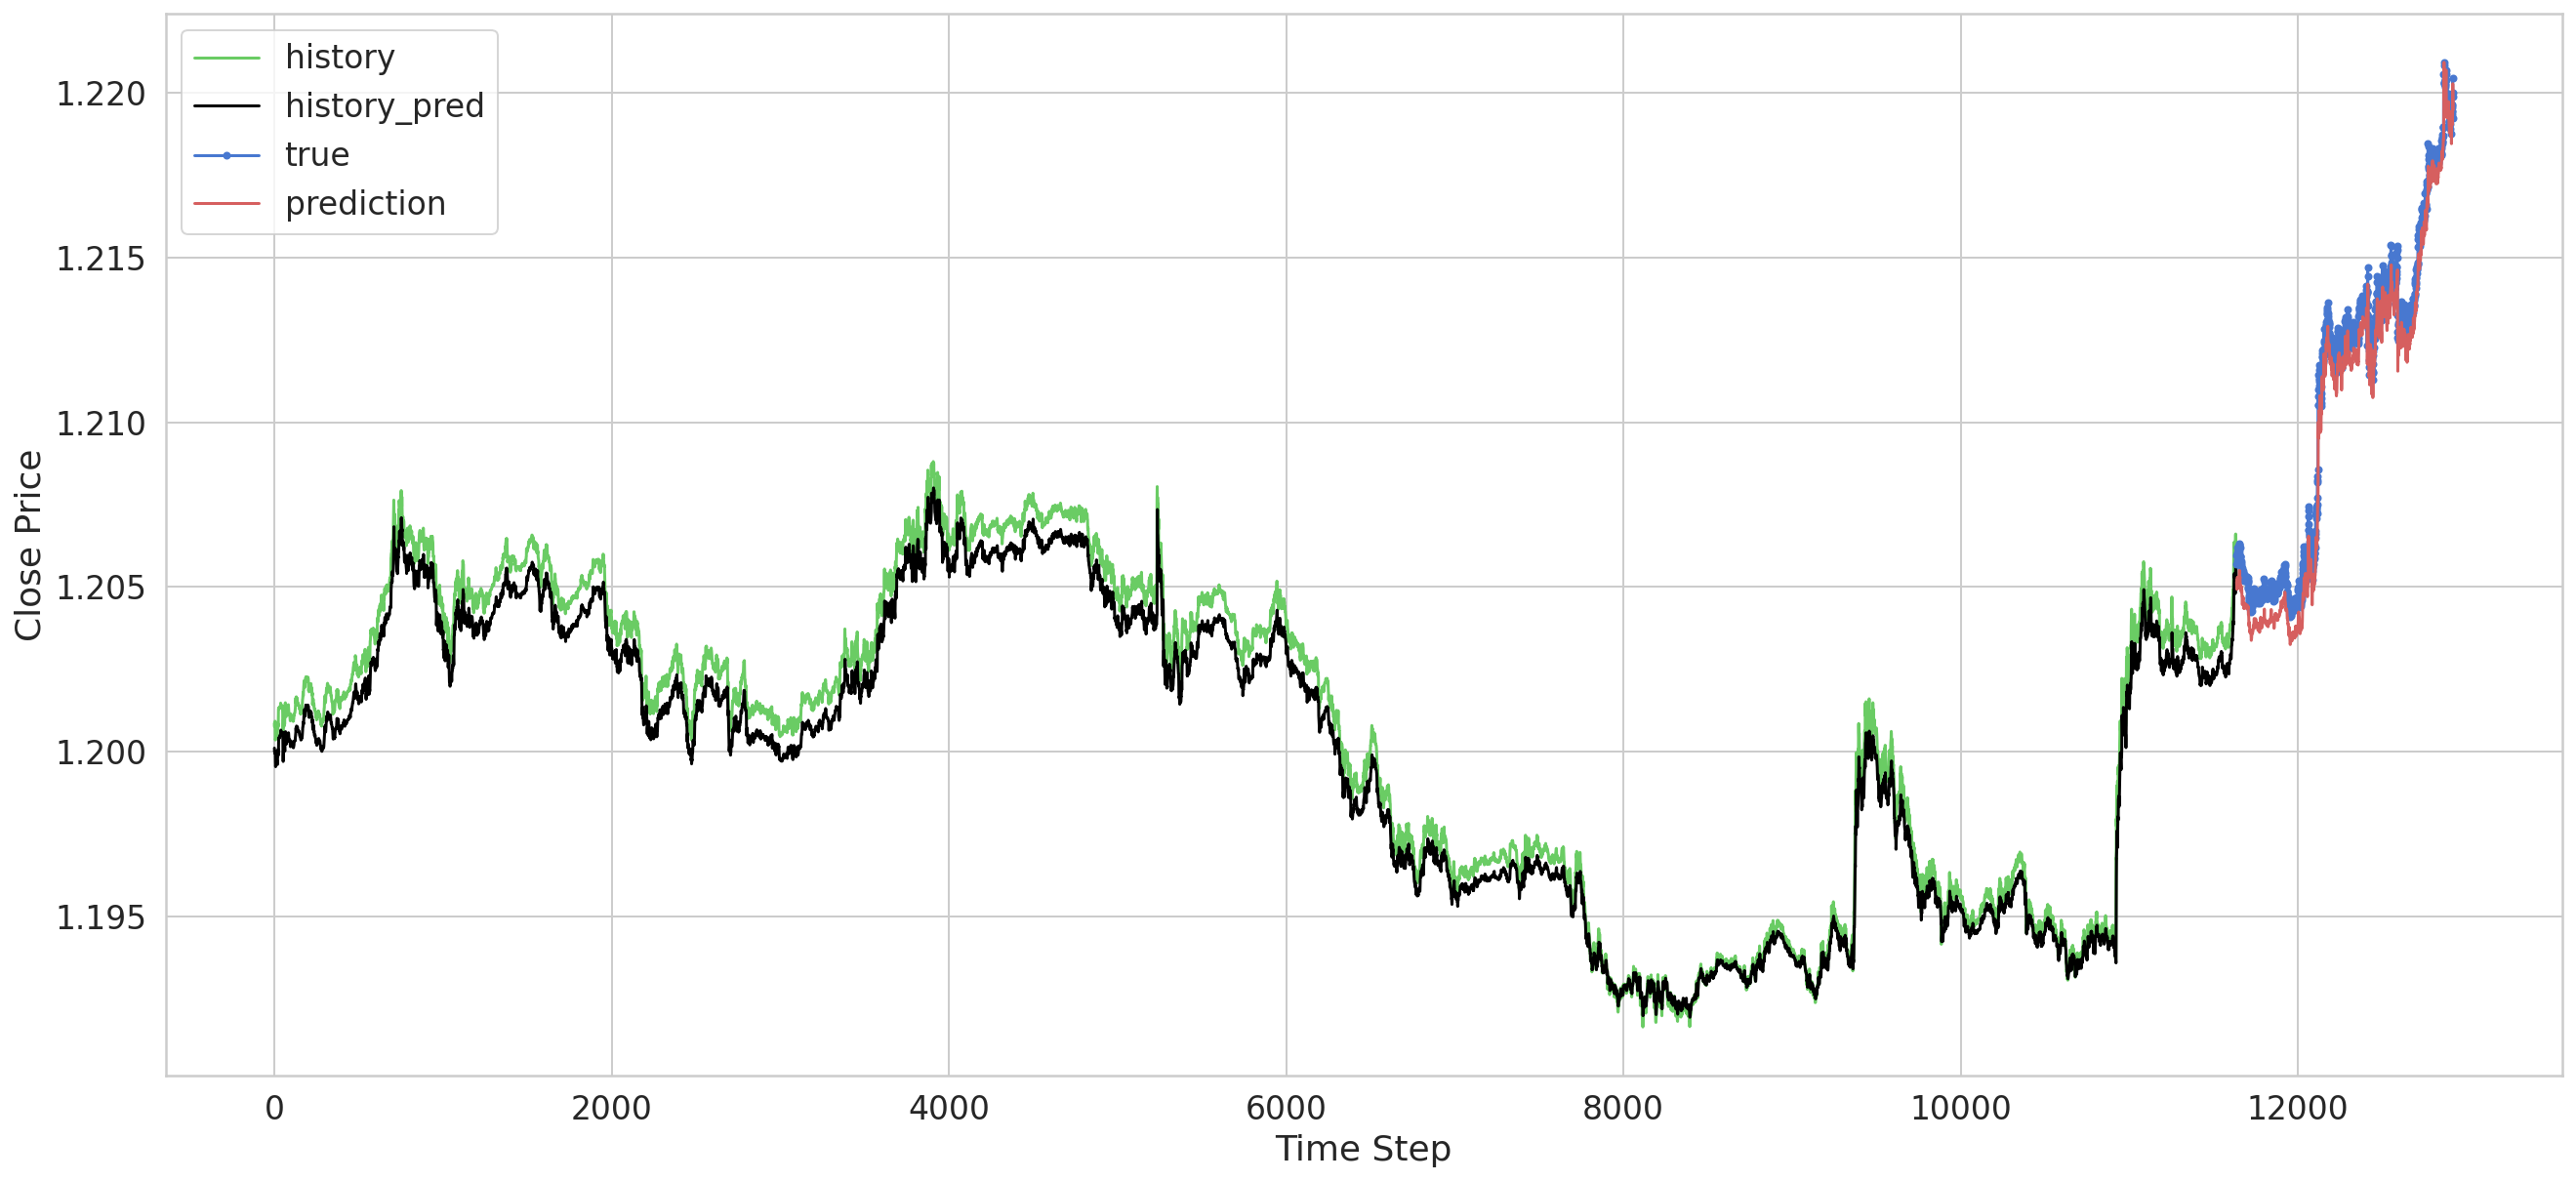

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(0, len(y_train)), y_pred_hist_inv.flatten(), 'black', label="history_pred")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Close Price')
plt.xlabel('Time Step')
plt.legend()
plt.show()

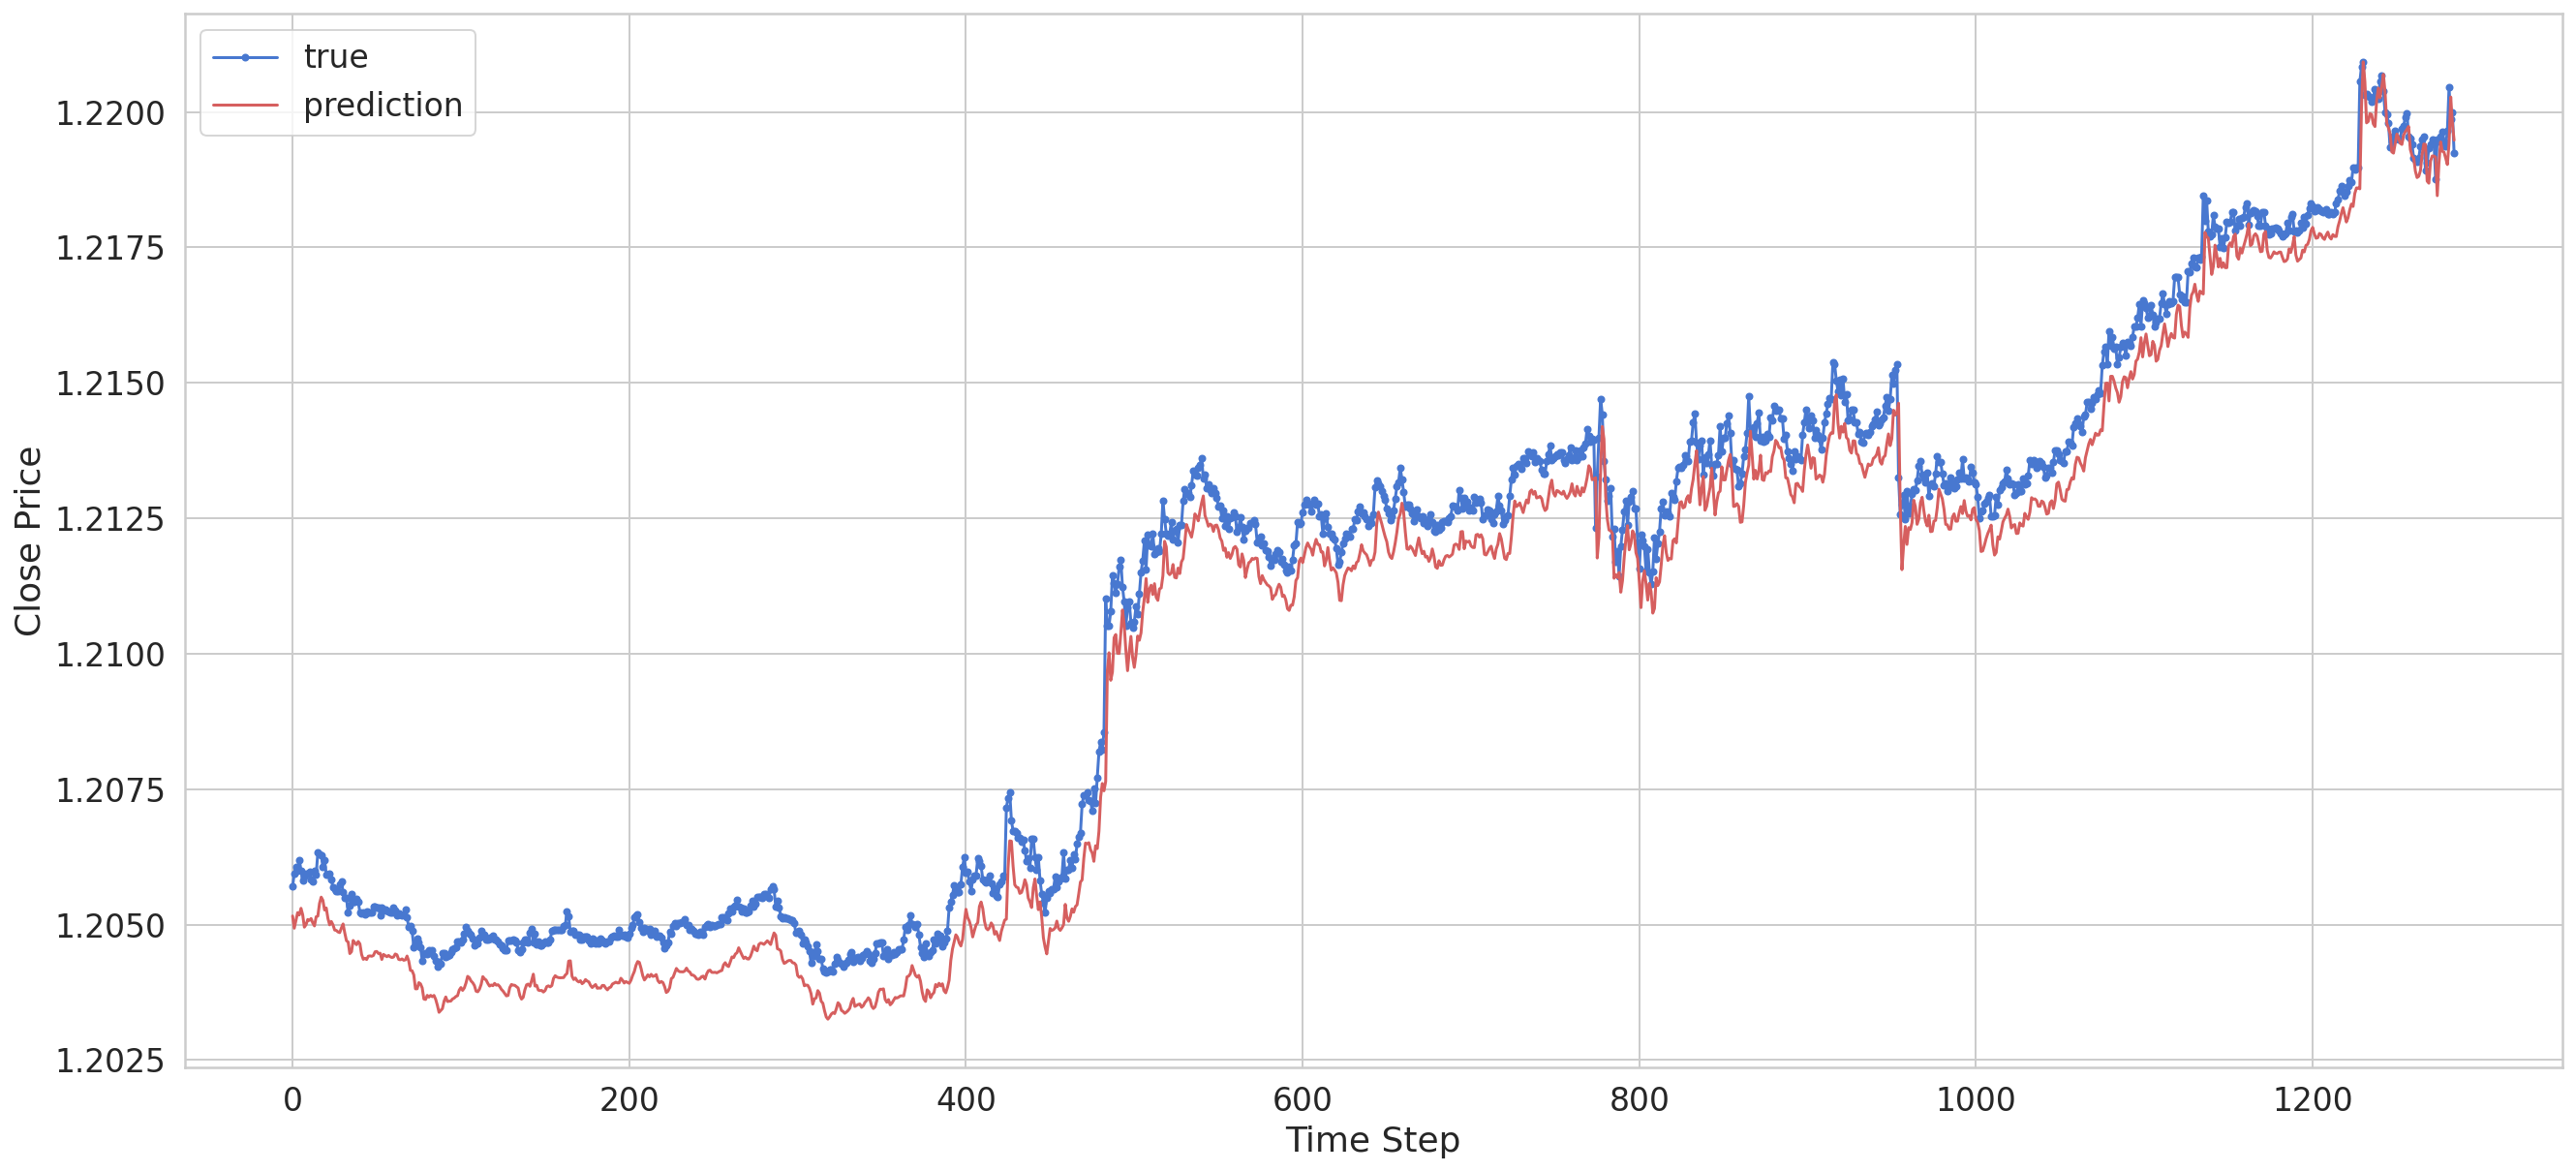

In [ ]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Close Price')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
fitted_df = pd.DataFrame.from_dict(
    {
        "ts": test.index[10:].tolist(),
        "c_test": y_test_inv.flatten().tolist(),
        "c_pred": y_pred_inv.flatten().tolist()
    },
)
fitted_df["ts"] = pd.to_datetime(fitted_df["ts"])
fitted_df = fitted_df.sort_values("ts")
fitted_df.shape

(1285, 3)

In [ ]:
fitted_df2 = fitted_df.merge(df[["o", "h", "l"]], left_on="ts", right_index=True, how="inner")
fitted_df2.shape

(1285, 6)

In [ ]:
fitted_df2.head()

,ts,c_test,c_pred,o,h,l
0,2018-01-11 19:36:00,1.20570,1.205160,1.20594,1.20594,1.20570
1,2018-01-11 19:37:00,1.20595,1.204935,1.20573,1.20600,1.20573
2,2018-01-11 19:38:00,1.20606,1.205074,1.20594,1.20606,1.20583
3,2018-01-11 19:39:00,1.20600,1.205223,1.20605,1.20607,1.20594
4,2018-01-11 19:40:00,1.20620,1.205179,1.20601,1.20620,1.20600


In [ ]:
df.loc[pd.Timestamp("2018-01-11 19:37:00")]

o                1.20573
h                1.20600
l                1.20573
c                1.20595
minute          37.00000
hour            19.00000
day_of_month    11.00000
day_of_week      3.00000
month            1.00000
Name: 2018-01-11 19:37:00, dtype: float64

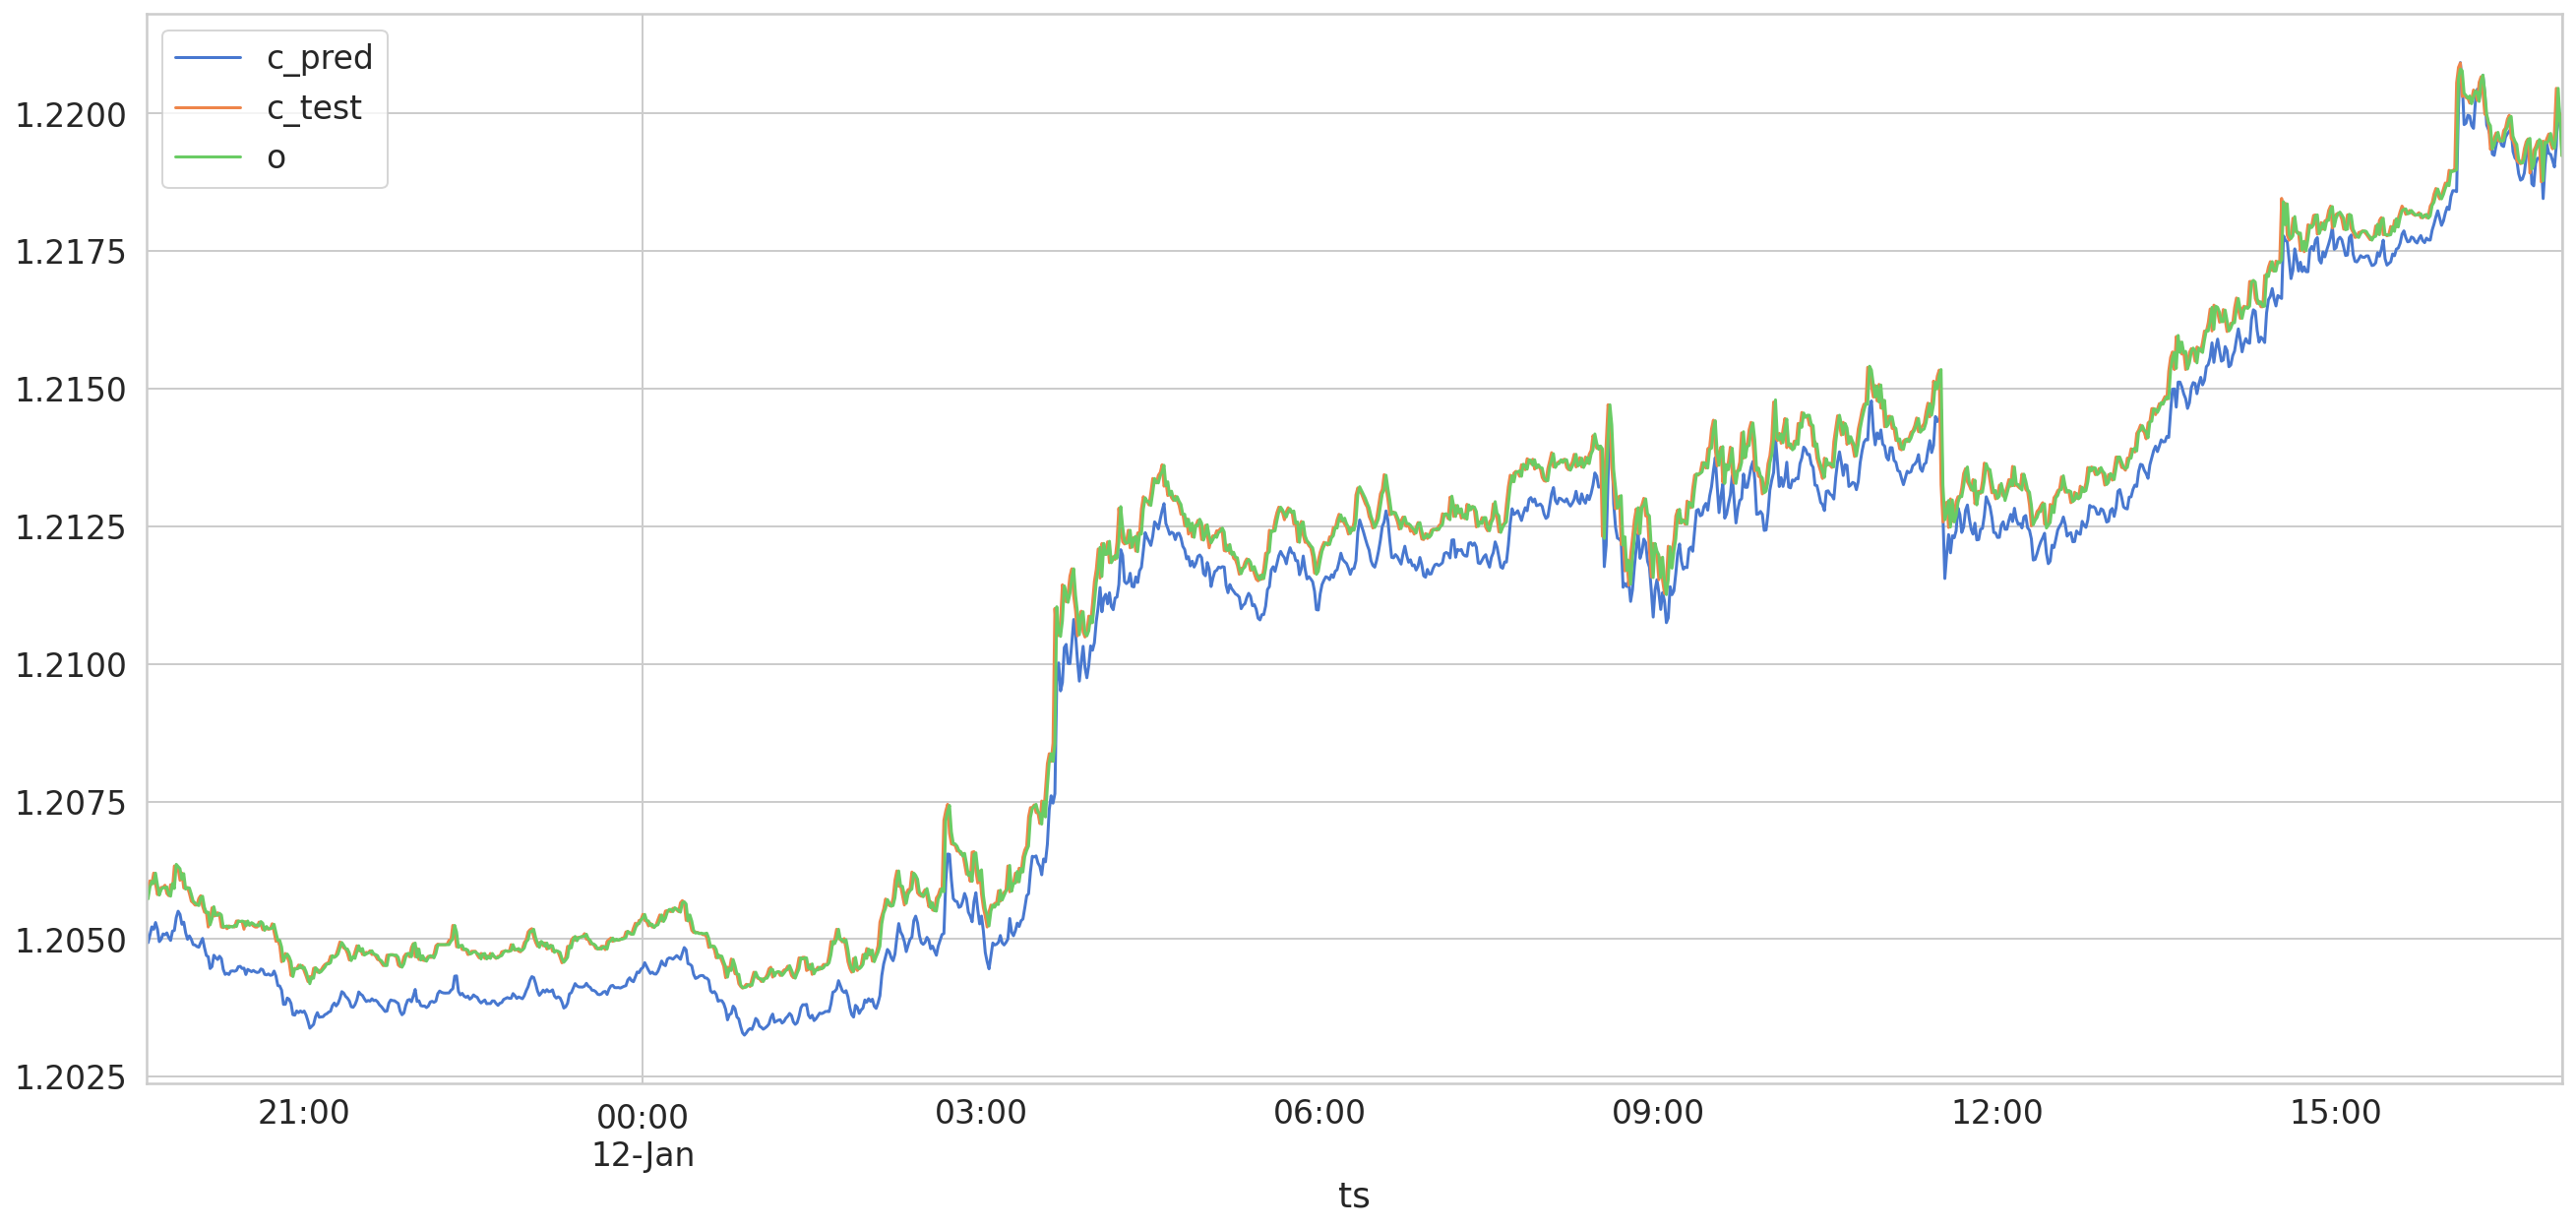

In [ ]:
fitted_df2.plot(x="ts", y=["c_pred", "c_test", "o"])

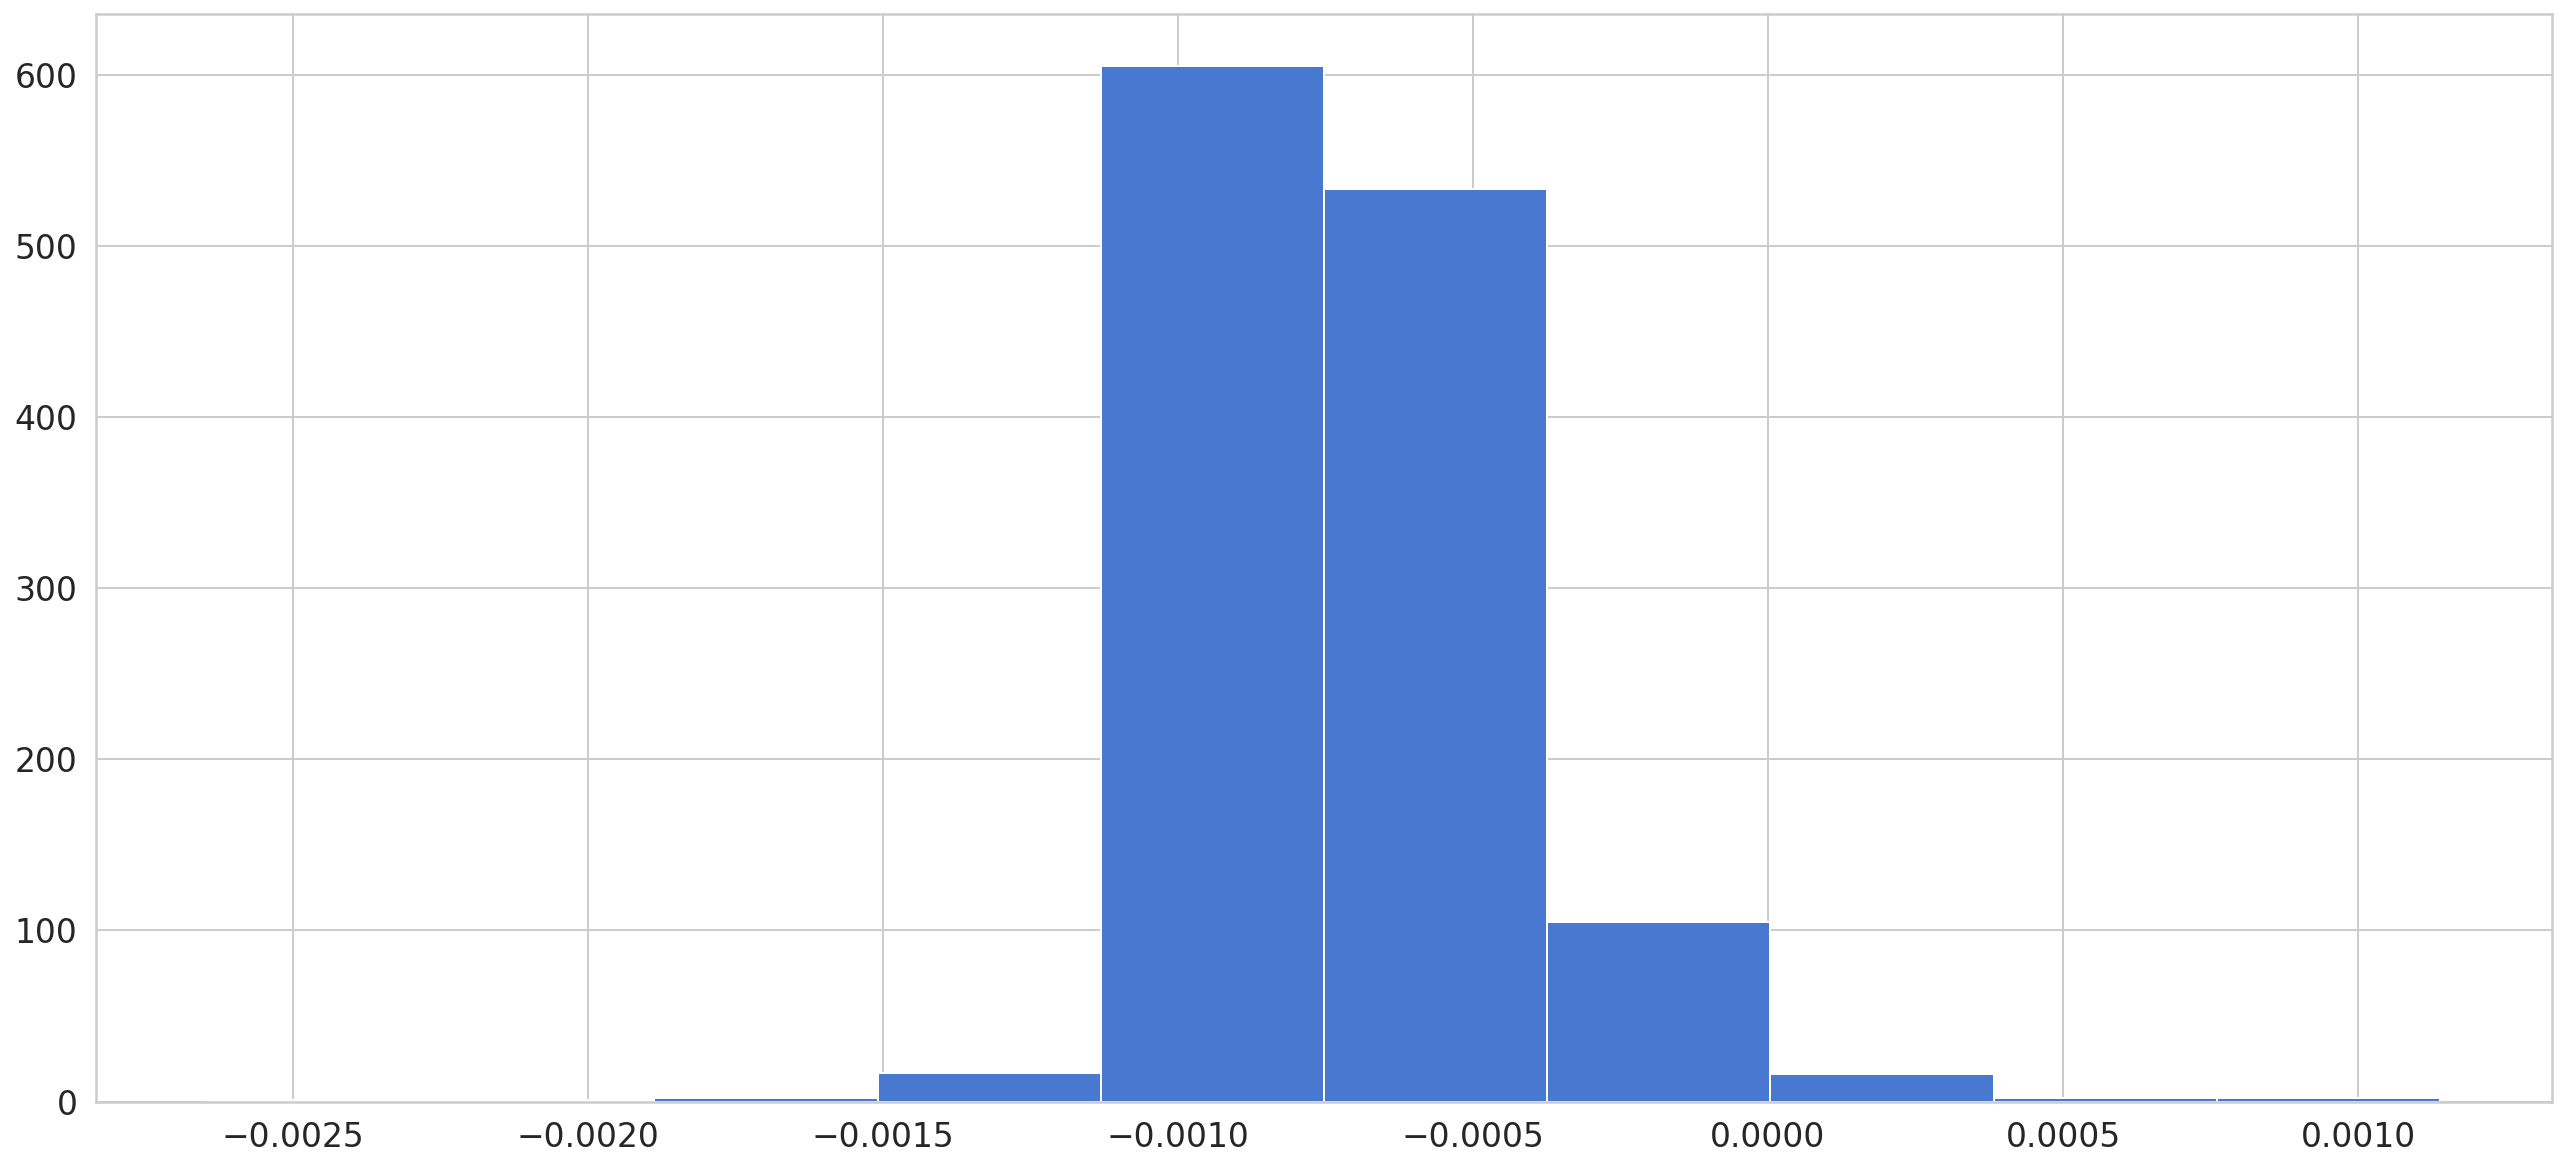

In [ ]:
fitted_df2["prior"] = fitted_df2["o"].shift(1)
fitted_df2["diff"] = fitted_df2["c_pred"] - fitted_df2["prior"]
fitted_df2["diff"].hist()

In [ ]:
fitted_df2["diff"].describe()

count    1284.000000
mean       -0.000698
std         0.000262
min        -0.002644
25%        -0.000856
50%        -0.000743
75%        -0.000560
max         0.001139
Name: diff, dtype: float64